# Midterm Project

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import warnings
from hmmlearn import hmm
warnings.filterwarnings("ignore")

# 1. Data Ingestion

In [2]:
# Import rawdata for analysis
data = pd.read_csv('ElectrofaciesVolve.csv')
data.head()

Well   Depth       GR    PEF1  PEF2       DT      ROP     WOB  DownT  \
0     1  2922.5  13.4058  8.7053   NaN  77.1874   4.5008  4.3012   71.0   
1     1  2923.0  15.2468  6.4380   NaN  75.5047   6.5108  4.9543   71.0   
2     1  2923.5  11.2243  6.2109   NaN  75.5697   7.6733  7.0439   71.0   
3     1  2924.0  11.7085  5.9728   NaN  75.9891  10.2010  7.0977   72.0   
4     1  2924.5  16.3429  6.1139   NaN  75.1929  12.8272  9.6089   72.0   

   Torque  ...    Mudflow     ECD   BS      RT    RHOB    NPHI  Vquartz  Vsh  \
0  23.583  ...  2200.9165  1.4182  8.5  1.6100  2.4838  0.1439      NaN  NaN   
1  33.721  ...  1993.9286  1.4188  8.5  1.6648  2.4837  0.1503      NaN  NaN   
2  34.831  ...  1993.9286  1.4195  8.5  1.6856  2.4823  0.1434      NaN  NaN   
3  35.166  ...  1993.9286  1.4204  8.5  1.4633  2.4479  0.1458      NaN  NaN   
4  34.892  ...  1993.9286  1.4206  8.5  1.5418  2.4836  0.1638      NaN  NaN   

   Vcarb  Facies  
0    NaN       0  
1    NaN       0  
2    NaN       0  
3    NaN       0  
4    NaN       0  

[5 rows x 23 columns]

In [3]:
# Create a list of well IDs, which we will extract a new dataframe from
wellID_list=[1]

# Extract a new DataFrame where 'Well' is in the well ID list
rawdata = data[data['Well'].isin(wellID_list)]
rawdata.head()

Well   Depth       GR    PEF1  PEF2       DT      ROP     WOB  DownT  \
0     1  2922.5  13.4058  8.7053   NaN  77.1874   4.5008  4.3012   71.0   
1     1  2923.0  15.2468  6.4380   NaN  75.5047   6.5108  4.9543   71.0   
2     1  2923.5  11.2243  6.2109   NaN  75.5697   7.6733  7.0439   71.0   
3     1  2924.0  11.7085  5.9728   NaN  75.9891  10.2010  7.0977   72.0   
4     1  2924.5  16.3429  6.1139   NaN  75.1929  12.8272  9.6089   72.0   

   Torque  ...    Mudflow     ECD   BS      RT    RHOB    NPHI  Vquartz  Vsh  \
0  23.583  ...  2200.9165  1.4182  8.5  1.6100  2.4838  0.1439      NaN  NaN   
1  33.721  ...  1993.9286  1.4188  8.5  1.6648  2.4837  0.1503      NaN  NaN   
2  34.831  ...  1993.9286  1.4195  8.5  1.6856  2.4823  0.1434      NaN  NaN   
3  35.166  ...  1993.9286  1.4204  8.5  1.4633  2.4479  0.1458      NaN  NaN   
4  34.892  ...  1993.9286  1.4206  8.5  1.5418  2.4836  0.1638      NaN  NaN   

   Vcarb  Facies  
0    NaN       0  
1    NaN       0  
2    NaN       0  
3    NaN       0  
4    NaN       0  

[5 rows x 23 columns]

In [4]:
rawdata.describe()

Well        Depth          GR        PEF1  PEF2          DT  \
count  534.0   534.000000  534.000000  534.000000   0.0  534.000000   
mean     1.0  3062.042135   41.994066    5.200142   NaN   79.061649   
std      0.0    83.629177   25.825989    0.776614   NaN    8.919196   
min      1.0  2922.500000    5.769100    3.168200   NaN   58.420000   
25%      1.0  2989.625000   23.134800    4.667900   NaN   73.948075   
50%      1.0  3057.250000   37.164950    5.272750   NaN   79.158100   
75%      1.0  3138.875000   55.491425    5.760750   NaN   84.845325   
max      1.0  3206.000000  197.197900    8.705300   NaN  122.440300   

              ROP         WOB       DownT      Torque  ...      Mudflow  \
count  534.000000  534.000000  534.000000  534.000000  ...   534.000000   
mean    22.201232    6.553471   85.468165   35.123652  ...  2332.045097   
std      6.815326    2.984674    6.678978    3.135973  ...   106.911405   
min      4.500800   -3.263200   71.000000   23.583000  ...  1943.103100   
25%     18.205825    5.187050   81.000000   34.362500  ...  2220.398875   
50%     21.944450    6.799300   88.000000   35.897000  ...  2392.714400   
75%     25.889425    8.381750   91.000000   37.137250  ...  2392.714400   
max     40.046900   13.605000   94.000000   40.169000  ...  2392.714400   

              ECD     BS          RT        RHOB        NPHI  Vquartz  Vsh  \
count  534.000000  534.0  534.000000  534.000000  534.000000      0.0  0.0   
mean     1.441332    8.5    3.214898    2.500460    0.153753      NaN  NaN   
std      0.013334    0.0    4.138785    0.119107    0.058103      NaN  NaN   
min      1.413700    8.5    0.319600    2.130400    0.054500      NaN  NaN   
25%      1.433100    8.5    1.607750    2.484050    0.109650      NaN  NaN   
50%      1.441000    8.5    2.168350    2.536950    0.149050      NaN  NaN   
75%      1.450000    8.5    3.287975    2.581400    0.185475      NaN  NaN   
max      1.471200    8.5   45.060000    2.689400    0.507600      NaN  NaN   

       Vcarb      Facies  
count    0.0  534.000000  
mean     NaN    0.449438  
std      NaN    0.624897  
min      NaN    0.000000  
25%      NaN    0.000000  
50%      NaN    0.000000  
75%      NaN    1.000000  
max      NaN    2.000000  

[8 rows x 23 columns]

# 2. Data Preparation

In [5]:
rawdata.columns

Index(['Well', 'Depth', 'GR', 'PEF1', 'PEF2', 'DT', 'ROP', 'WOB', 'DownT',
       'Torque', 'SurfRPM', 'PumpPress', 'DownP', 'Mudflow', 'ECD', 'BS', 'RT',
       'RHOB', 'NPHI', 'Vquartz', 'Vsh', 'Vcarb', 'Facies'],
      dtype='object')

In [6]:
# Extract surface drilling parameters 
rawdata = rawdata[['Depth','ROP','WOB','Torque','SurfRPM','PumpPress','Mudflow', 'ECD', 'BS','Facies']]
rawdata.head()

Depth      ROP     WOB  Torque  SurfRPM  PumpPress    Mudflow     ECD  \
0  2922.5   4.5008  4.3012  23.583   79.554     27.348  2200.9165  1.4182   
1  2923.0   6.5108  4.9543  33.721   79.394     23.140  1993.9286  1.4188   
2  2923.5   7.6733  7.0439  34.831   79.254     23.138  1993.9286  1.4195   
3  2924.0  10.2010  7.0977  35.166   79.616     23.153  1993.9286  1.4204   
4  2924.5  12.8272  9.6089  34.892   79.828     23.344  1993.9286  1.4206   

    BS  Facies  
0  8.5       0  
1  8.5       0  
2  8.5       0  
3  8.5       0  
4  8.5       0

### 2.1 Missing Value Treatment

In [7]:
# Check for missing values
rawdata.isna().sum()

Depth        0
ROP          0
WOB          0
Torque       0
SurfRPM      0
PumpPress    0
Mudflow      0
ECD          0
BS           0
Facies       0
dtype: int64

**Comment**

There are no missing values

### 2.2 Outliers Treatment

In [8]:
# Rename the features of the new dataframe
rawdata = rawdata.rename(columns={'SurfRPM': 'RPM'})
rawdata = rawdata.rename(columns={'Mudflow': 'flowRate'})

##### 2.2.1 Bivariate Analysis

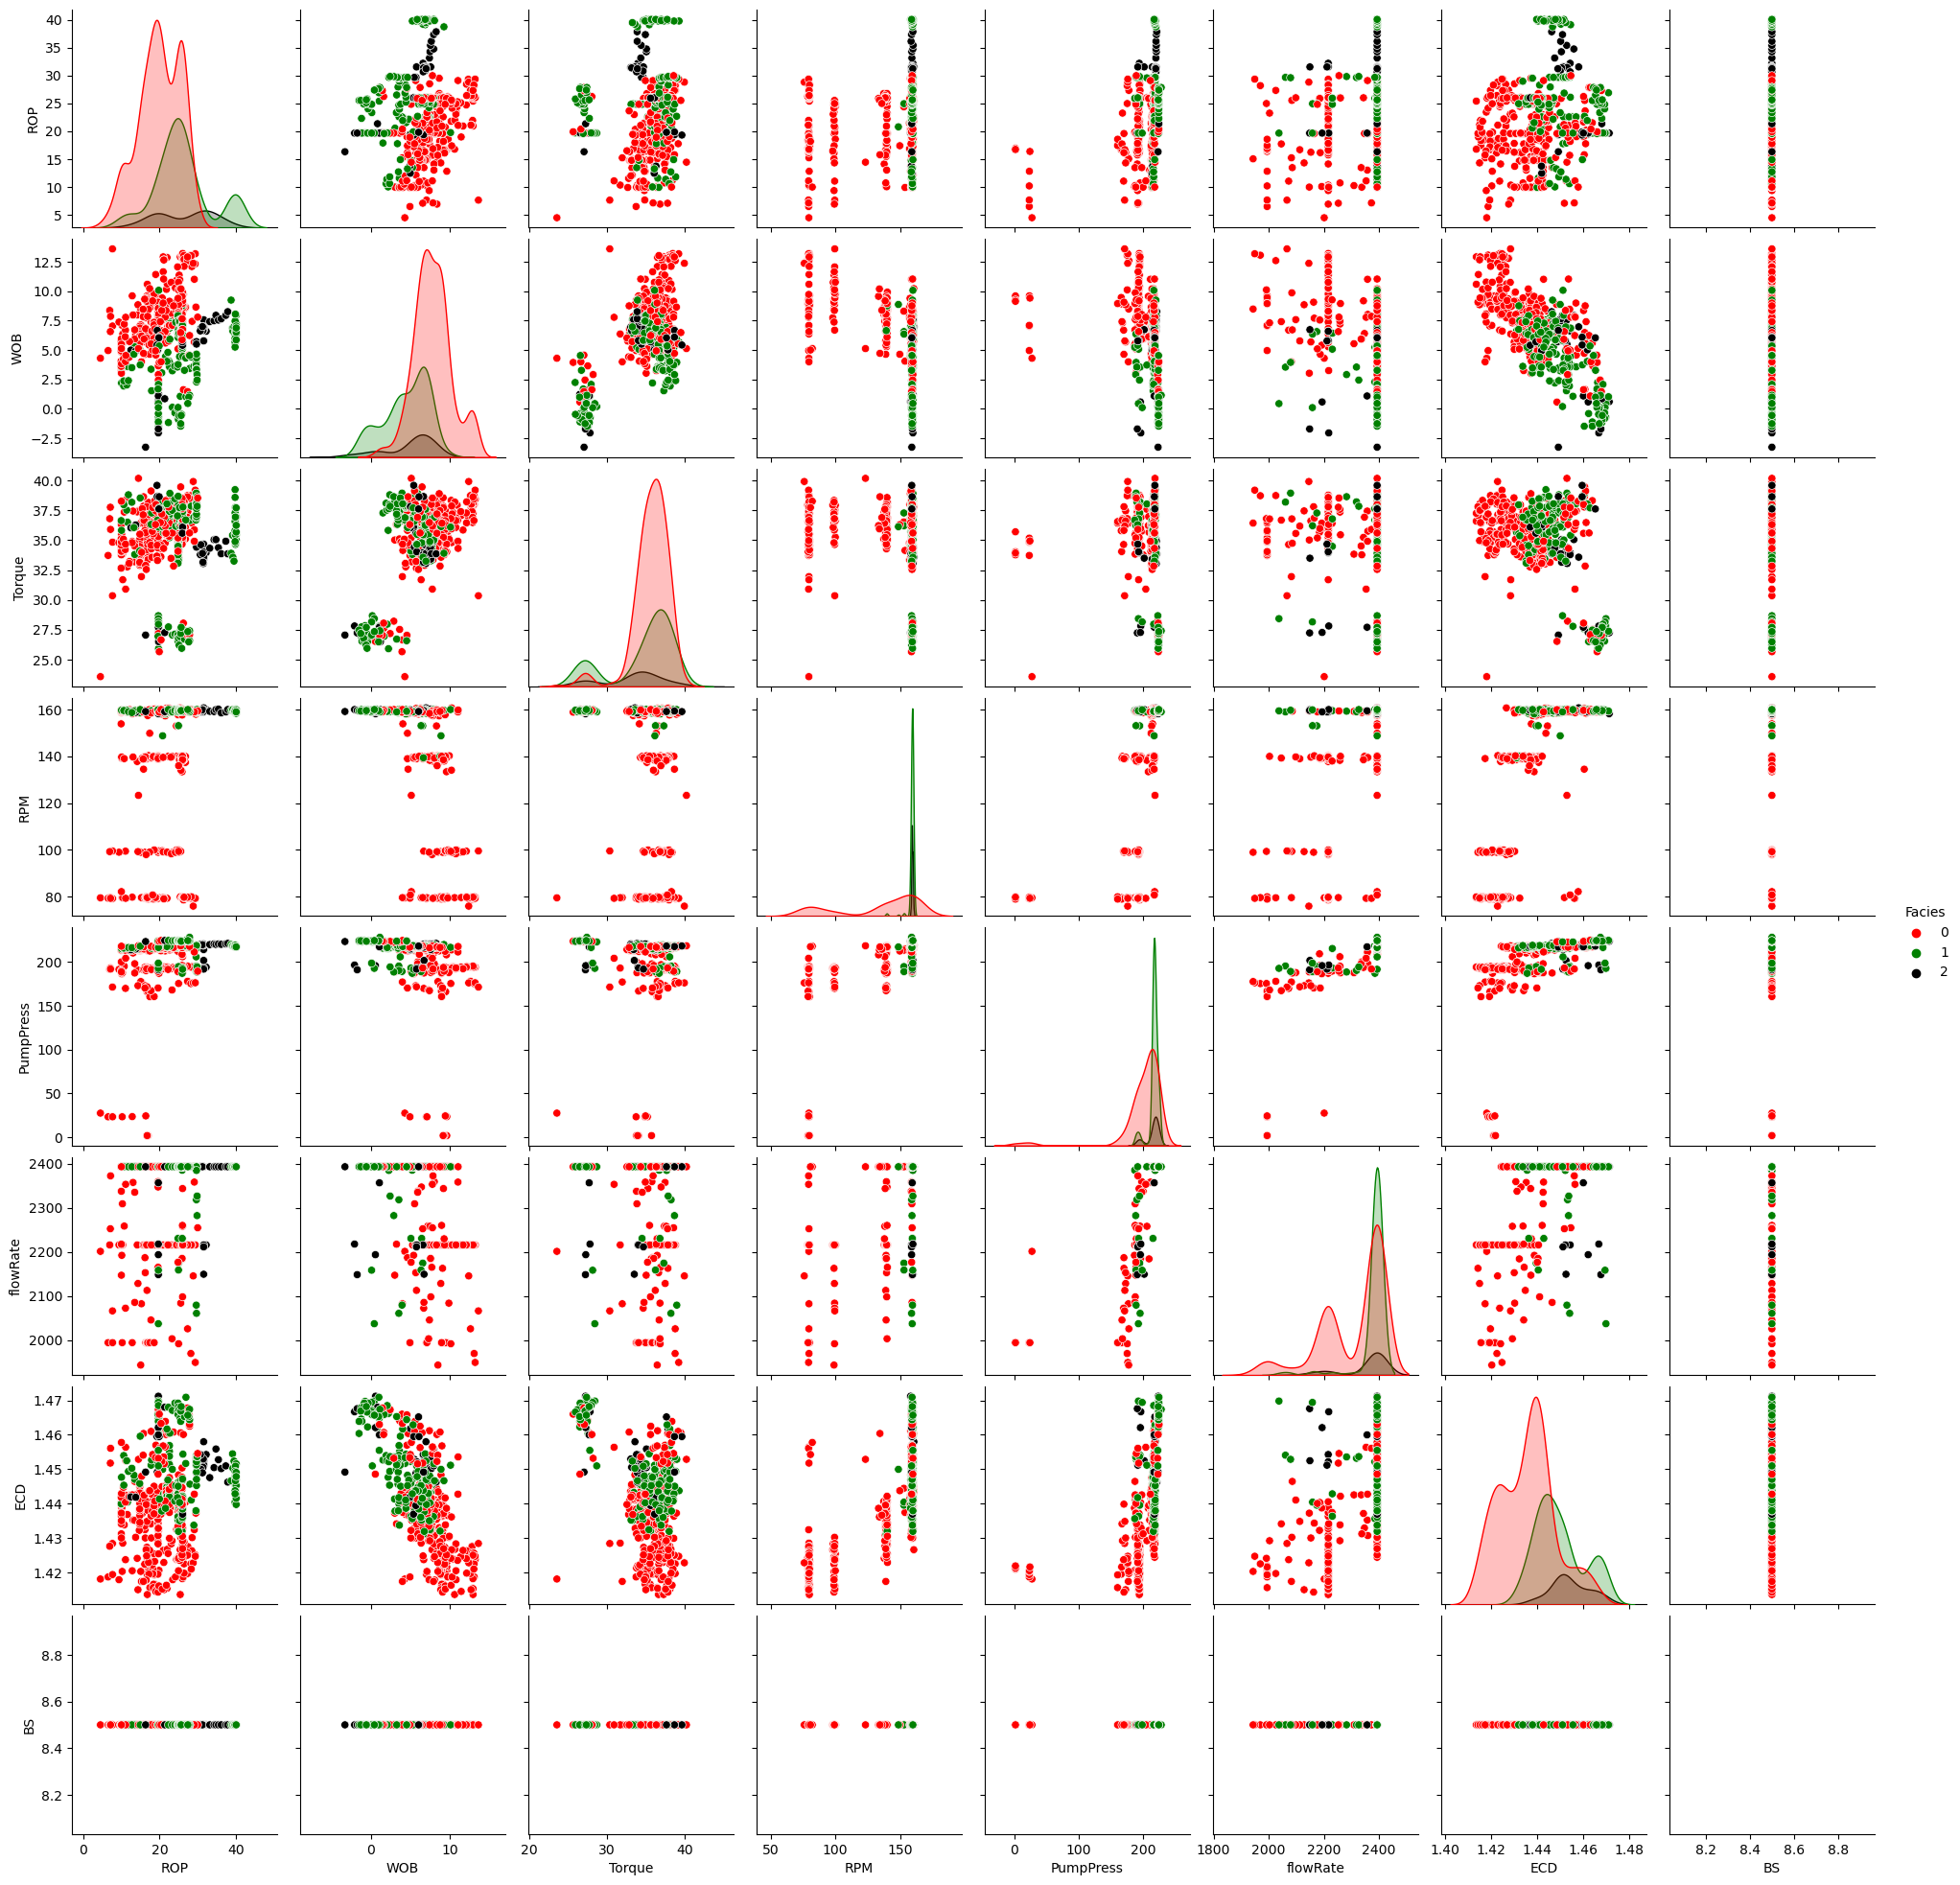

In [9]:
# Create a matrix scatterplot for bivariate analysis
sns.pairplot(rawdata, vars=['ROP','WOB','Torque','RPM','PumpPress','flowRate', 'ECD', 'BS'], hue = 'Facies', palette = ['Red','Green', 'Black'])

##### 2.2.2 Univariate Analysis

<AxesSubplot:ylabel='ROP'>

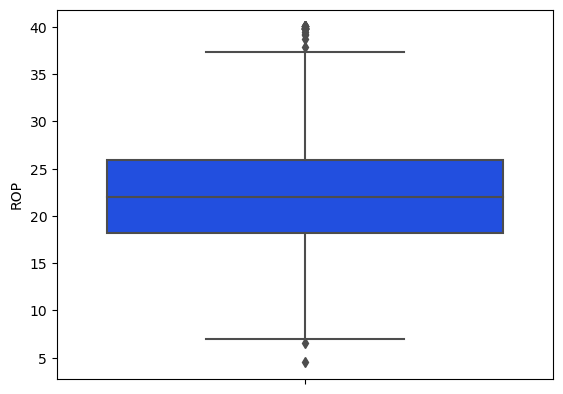

In [10]:
# Univariate Analysis of the Rate of Penetration
sns.boxplot(y=rawdata['ROP'], palette = "bright")

<AxesSubplot:ylabel='WOB'>

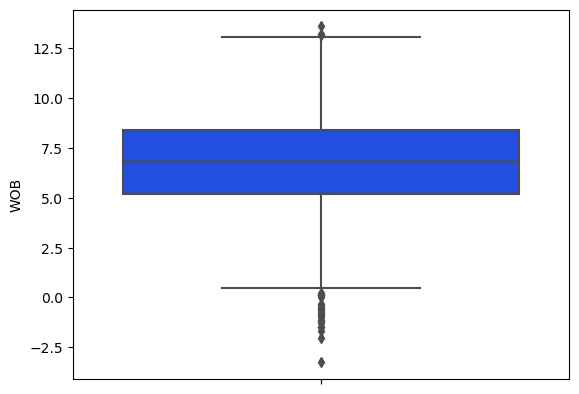

In [11]:
# Univariate Analysis of the Weight on Bit
sns.boxplot(y=rawdata['WOB'], palette = "bright")

<AxesSubplot:ylabel='RPM'>

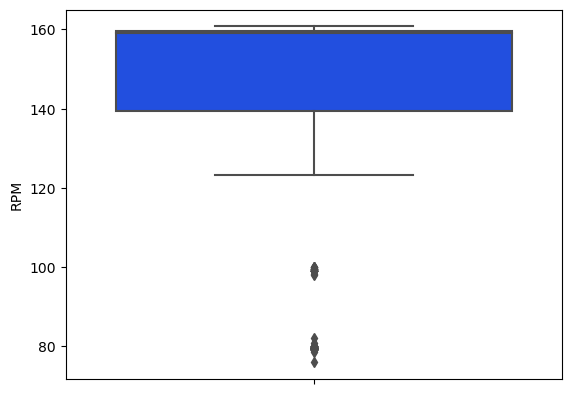

In [12]:
# Univariate Analysis of Rotary Speed
sns.boxplot(y=rawdata['RPM'], palette = "bright")

<AxesSubplot:ylabel='Torque'>

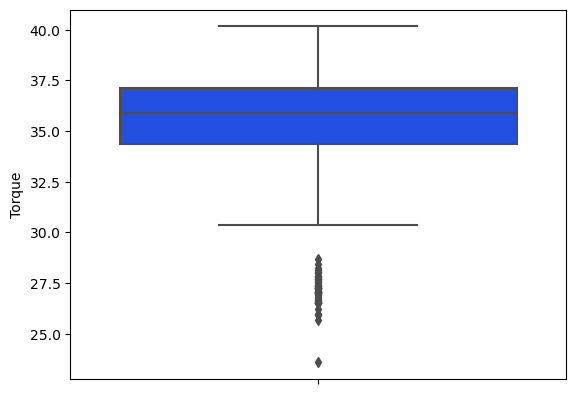

In [13]:
# Univariate Analysis of Torque
sns.boxplot(y=rawdata['Torque'], palette = "bright")

<AxesSubplot:ylabel='PumpPress'>

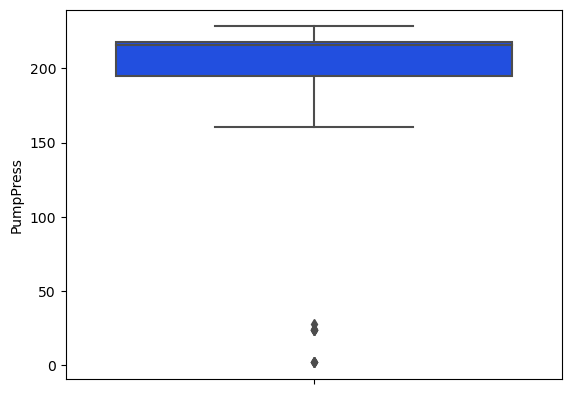

In [14]:
# Univariate Analysis of Pump Pressure
sns.boxplot(y=rawdata['PumpPress'], palette = "bright")

<AxesSubplot:ylabel='flowRate'>

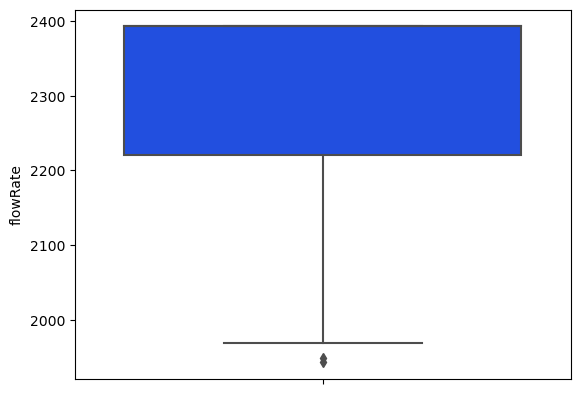

In [15]:
# Univariate Analysis of FLow Rate
sns.boxplot(y=rawdata['flowRate'], palette = "bright")

<AxesSubplot:ylabel='ECD'>

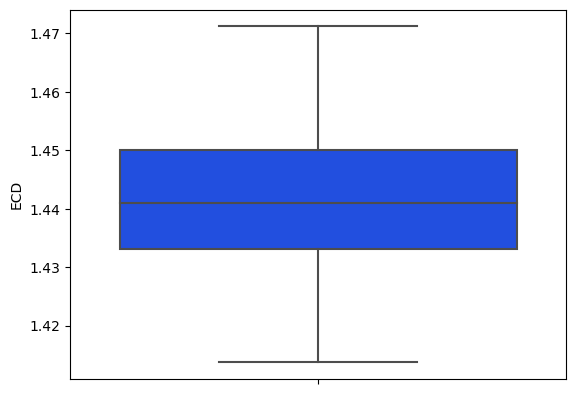

In [16]:
# Univariate Analysis of Equivalent Circulating Density
sns.boxplot(y=rawdata['ECD'], palette = "bright")

<AxesSubplot:ylabel='BS'>

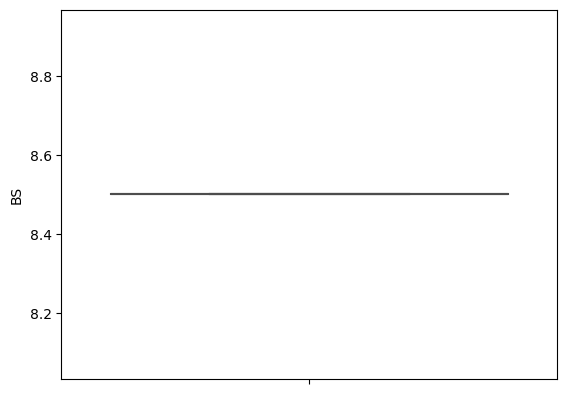

In [17]:
# Univariate Analysis of BS
sns.boxplot(y=rawdata['BS'], palette = "bright")

**Comments**

From the above Univariate and Bivariate Analysis, the following can be observed.

* Negative Weight on Bit (WOB) values
* outliers spottted below 30 in Torque
* outliers spottted below 130 in RPM
* outliers spottted below 175 in Pumppressure
* Bit size(BS) shows a single value which bears no information, however it can be used to derive new features such as the mechanical specific energy (MSE), which is the energy required to crush a rock.

In [18]:
import math
# Calculate mechanical specific energy
rawdata['MSE'] = ((480*rawdata['Torque']*rawdata['RPM'])/((rawdata['BS']**2)*rawdata['ROP']))+((4*rawdata['WOB'])/(math.pi*(rawdata['BS']**2)))
rawdata = rawdata.drop(columns=['BS'])
rawdata.describe()

Depth         ROP         WOB      Torque         RPM  \
count   534.000000  534.000000  534.000000  534.000000  534.000000   
mean   3062.042135   22.201232    6.553471   35.123652  142.833904   
std      83.629177    6.815326    2.984674    3.135973   28.103707   
min    2922.500000    4.500800   -3.263200   23.583000   76.000000   
25%    2989.625000   18.205825    5.187050   34.362500  139.414250   
50%    3057.250000   21.944450    6.799300   35.897000  159.045500   
75%    3138.875000   25.889425    8.381750   37.137250  159.567250   
max    3206.000000   40.046900   13.605000   40.169000  160.743000   

        PumpPress     flowRate         ECD      Facies          MSE  
count  534.000000   534.000000  534.000000  534.000000   534.000000  
mean   206.396228  2332.045097    1.441332    0.449438  1644.400458  
std     29.566447   106.911405    0.013334    0.624897   656.877343  
min      1.645000  1943.103100    1.413700    0.000000   664.603113  
25%    194.932750  2220.398875    1.433100    0.000000  1172.379483  
50%    216.075500  2392.714400    1.441000    0.000000  1496.349811  
75%    217.893500  2392.714400    1.450000    1.000000  1831.650394  
max    228.420000  2392.714400    1.471200    2.000000  3901.114103

<AxesSubplot:ylabel='MSE'>

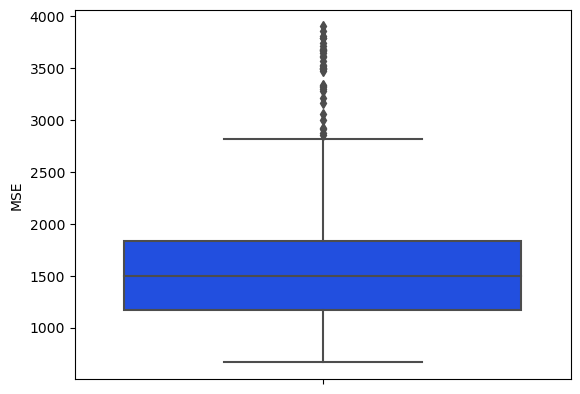

In [19]:
# Univariate Analysis of Mechanical Specific Energy
sns.boxplot(y=rawdata['MSE'], palette = "bright")

In [20]:
# Removal of outliers
df_clean = rawdata[(rawdata['WOB'] > 0) & 
                 (rawdata['Torque'] > 30) &
                 (rawdata['RPM'] > 130) & 
                 (rawdata['PumpPress'] > 175) & 
                 (rawdata['ROP'] > 6) & (rawdata['ROP'] < 37)
                 ]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 90 to 479
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      352 non-null    float64
 1   ROP        352 non-null    float64
 2   WOB        352 non-null    float64
 3   Torque     352 non-null    float64
 4   RPM        352 non-null    float64
 5   PumpPress  352 non-null    float64
 6   flowRate   352 non-null    float64
 7   ECD        352 non-null    float64
 8   Facies     352 non-null    int64  
 9   MSE        352 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 30.2 KB


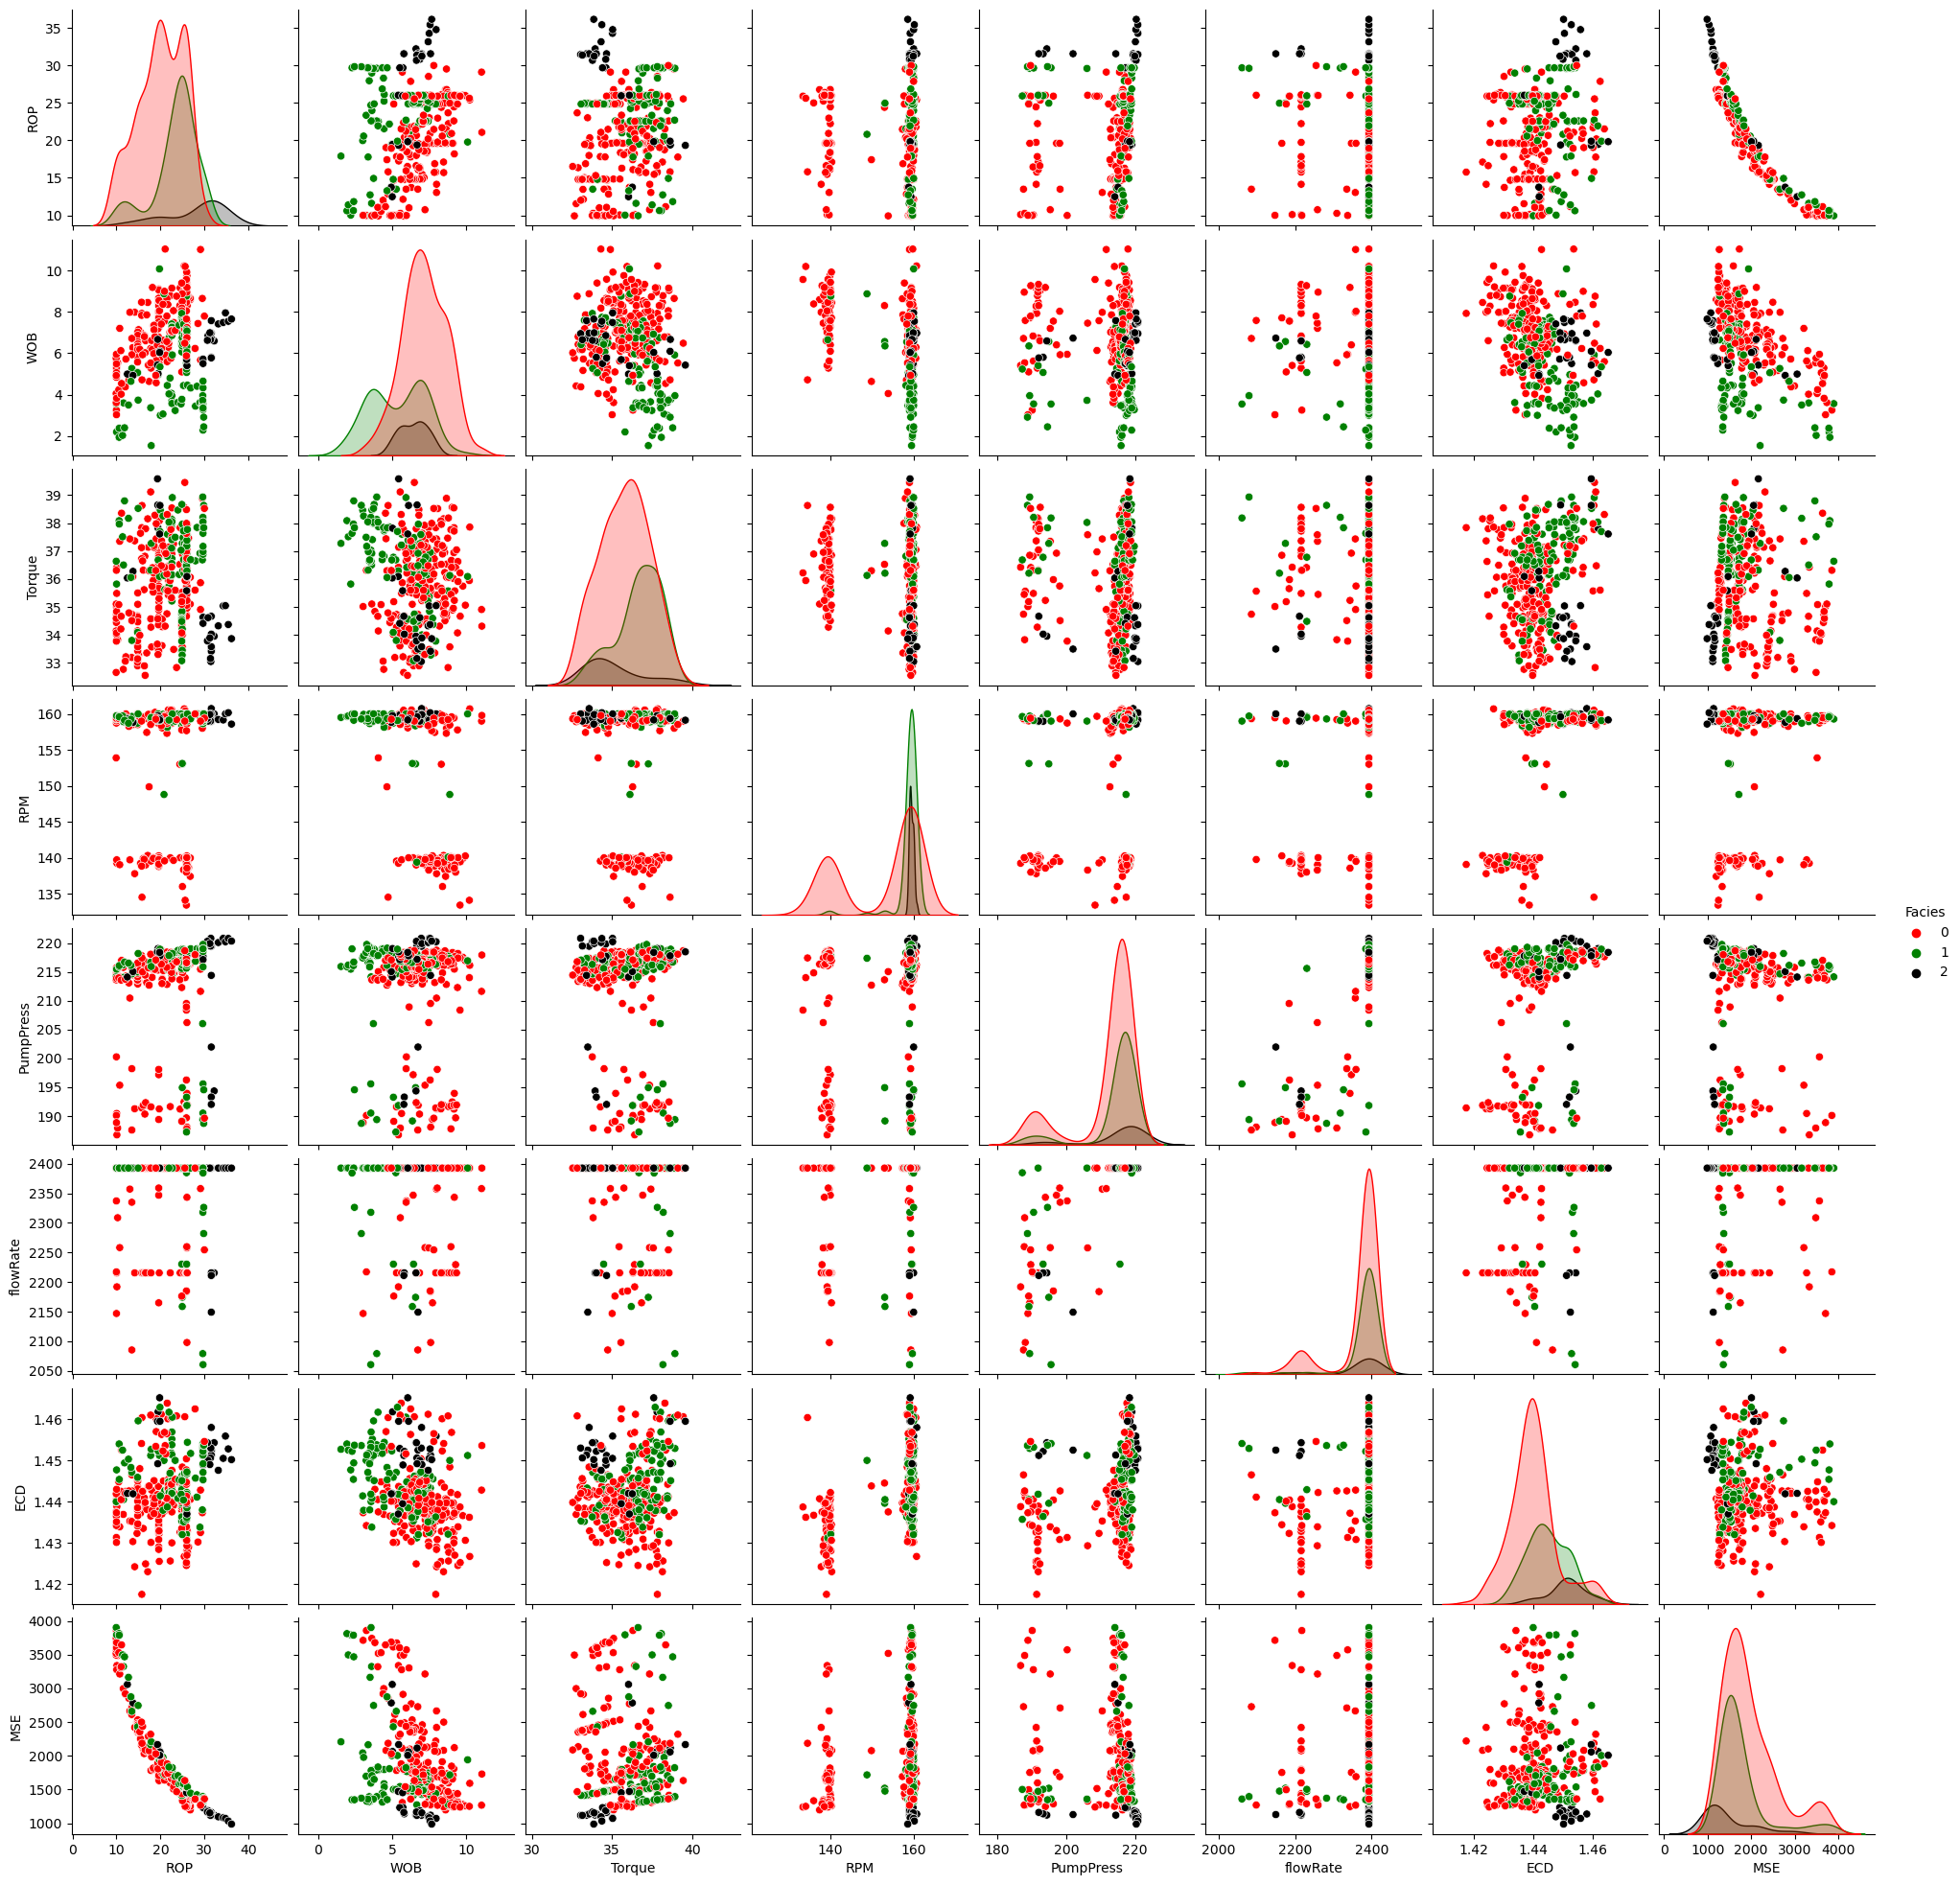

In [21]:
# Create a matrix scatterplot of the cleaned data
sns.pairplot(df_clean, vars=['ROP','WOB','Torque','RPM','PumpPress','flowRate', 'ECD', 'MSE'], hue = 'Facies', palette = ['Red','Green', 'Black'])

# 3. Exploration Data Analysis

### 3.1: Visualization of Features Distribution

Text(0.5, 1.0, 'ROP Distribution')

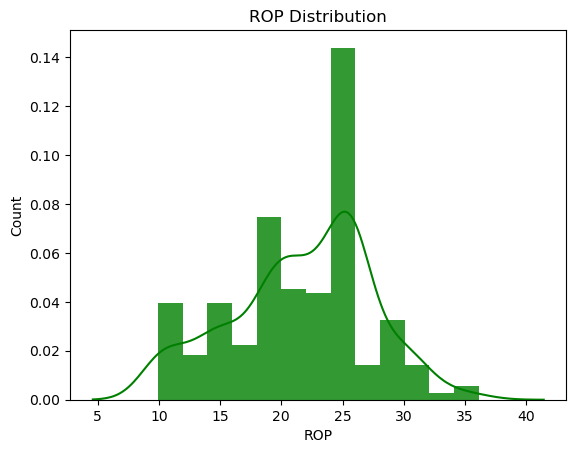

In [22]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['ROP'], kde=True, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('ROP Distribution')

Text(0.5, 1.0, 'WOB Distribution')

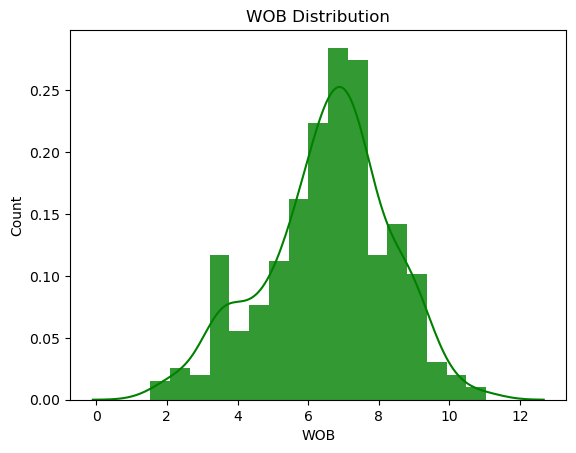

In [23]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['WOB'], kde=True, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('WOB Distribution')

Text(0.5, 1.0, 'RPM Distribution')

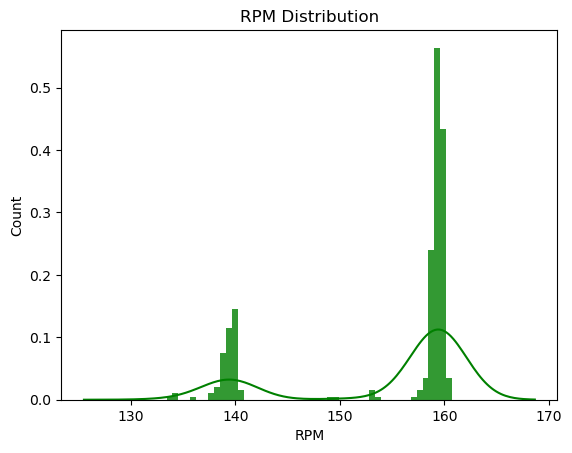

In [24]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['RPM'], kde=True, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('RPM Distribution')

Text(0.5, 1.0, 'Torque Distribution')

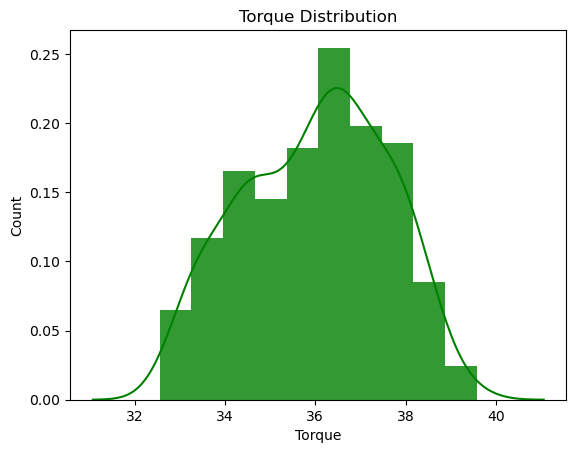

In [25]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['Torque'], kde=True, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Torque Distribution')

Text(0.5, 1.0, 'Pump Pressure Distribution')

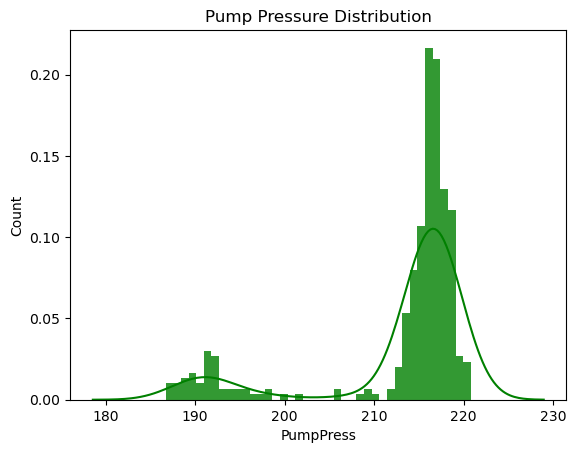

In [26]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['PumpPress'], kde=True, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Pump Pressure Distribution')

Text(0.5, 1.0, 'Flow Rate Distribution')

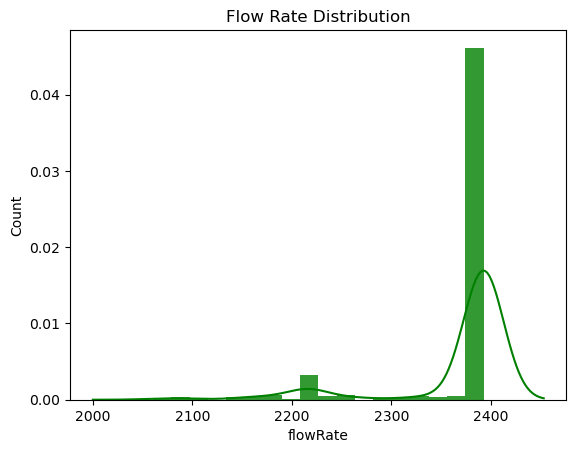

In [27]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['flowRate'], kde=True, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Flow Rate Distribution')

Text(0.5, 1.0, 'ECD Distribution')

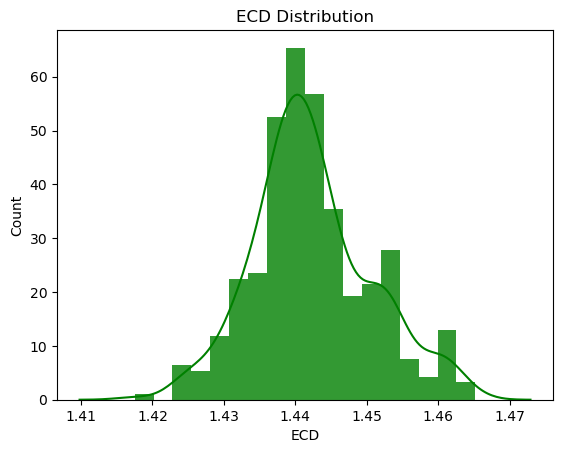

In [28]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['ECD'], kde=True, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('ECD Distribution')

Text(0.5, 1.0, 'MSE Distribution')

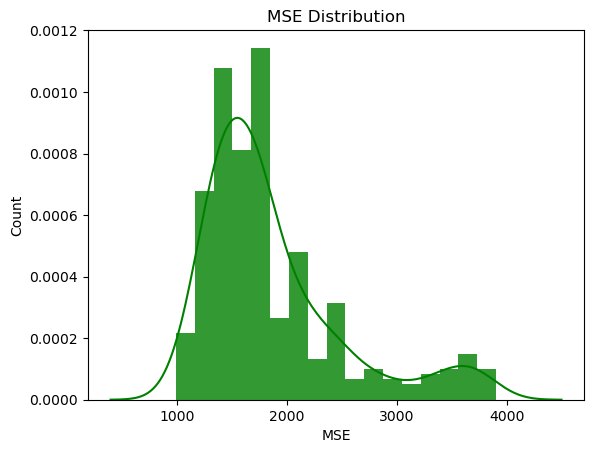

In [29]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['MSE'], kde=True, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('MSE Distribution')

**Comment**

* There are 3 bimodal distributions; MSE, flow rate, RPM and pump pressure.
* ROP, WOB, Torque, ECD exhibit approximate normal distribution.

### 3.2: Visualization of Features Distribution according to Facies

In [30]:
# group by the Facies and determine the mean of each feature
df_explore = df_clean[['ROP','WOB','Torque','RPM','PumpPress','flowRate', 'ECD', 'MSE', 'Facies']]
df_p = df_explore.groupby(['Facies']).mean()
df_p = df_p.reset_index()
df_p.head()

Facies        ROP       WOB     Torque         RPM   PumpPress  \
0       0  20.054506  7.124321  35.780191  152.095455  212.024291   
1       1  23.424700  5.336655  36.666533  158.867057  214.507943   
2       2  27.933385  6.411763  35.169037  159.458259  215.120519   

      flowRate       ECD          MSE  
0  2364.532581  1.439873  1955.712134  
1  2376.599531  1.445004  1770.617761  
2  2363.831156  1.451511  1461.843400

Text(0.5, 1.0, 'Average ROP according to Facies')

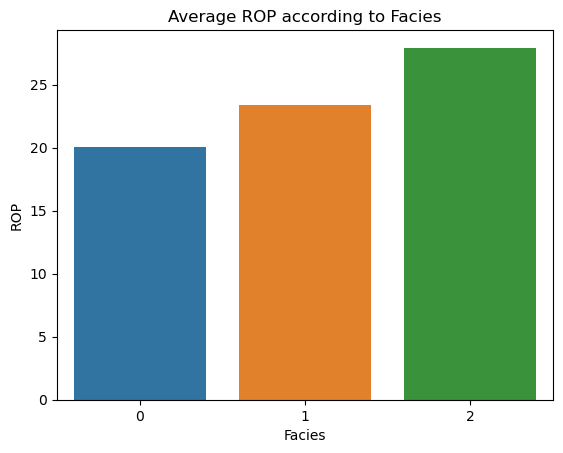

In [31]:
# Plot of the Average Rate of penetration according to Facies
sns.barplot(x=df_p["Facies"], y=df_p["ROP"])
plt.title('Average ROP according to Facies')

Text(0.5, 1.0, 'Average WOB according to Facies')

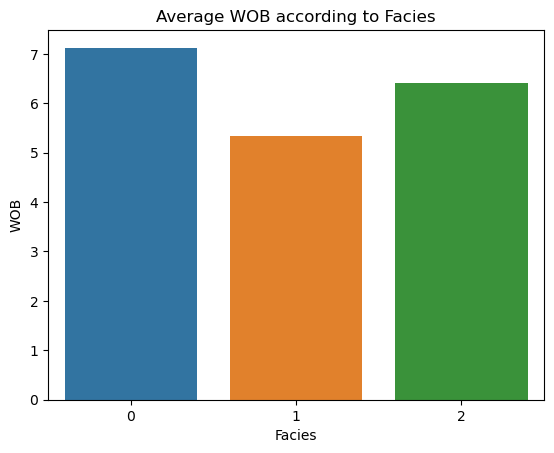

In [32]:
# Plot of the Average Weight on Bit according to Facies
sns.barplot(x=df_p["Facies"], y=df_p["WOB"])
plt.title('Average WOB according to Facies')

Text(0.5, 1.0, 'Average RPM according to Facies')

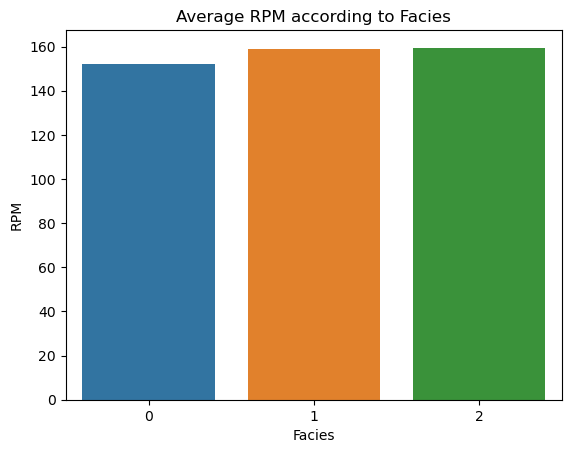

In [33]:
# Plot of the Average Rotary Speed according to Facies
sns.barplot(x=df_p["Facies"], y=df_p["RPM"])
plt.title('Average RPM according to Facies')

Text(0.5, 1.0, 'Average Torque according to Facies')

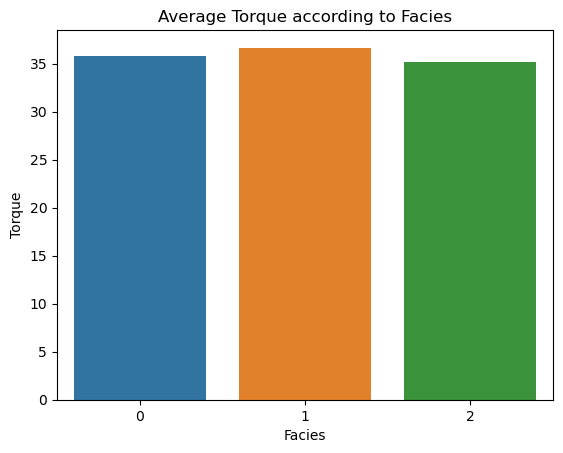

In [34]:
# Plot of the Average Torque according to Facies
sns.barplot(x=df_p["Facies"], y=df_p["Torque"])
plt.title('Average Torque according to Facies')

Text(0.5, 1.0, 'Average Flow Rate according to Facies')

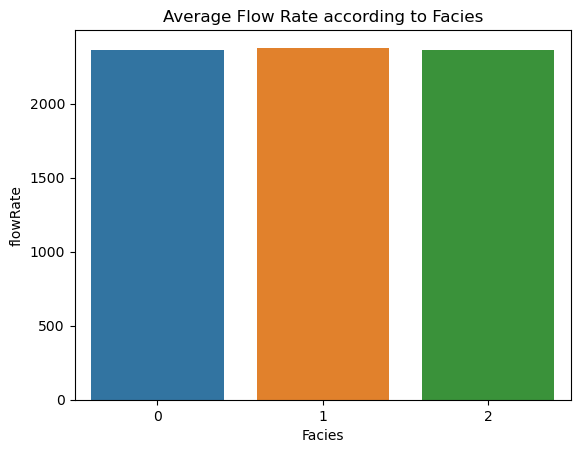

In [35]:
# Plot of the Average Flow Rate according to Facies
sns.barplot(x=df_p["Facies"], y=df_p["flowRate"])
plt.title('Average Flow Rate according to Facies')

Text(0.5, 1.0, 'Average ECD according to Facies')

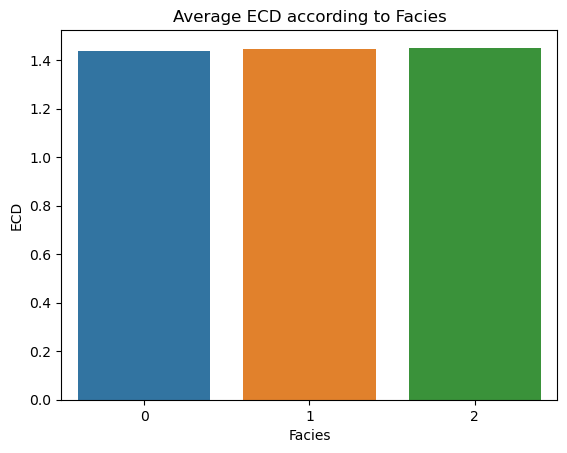

In [36]:
# Plot of the Average ECD according to Facies
sns.barplot(x=df_p["Facies"], y=df_p["ECD"])
plt.title('Average ECD according to Facies')

Text(0.5, 1.0, 'Average Pump Pressure according to Facies')

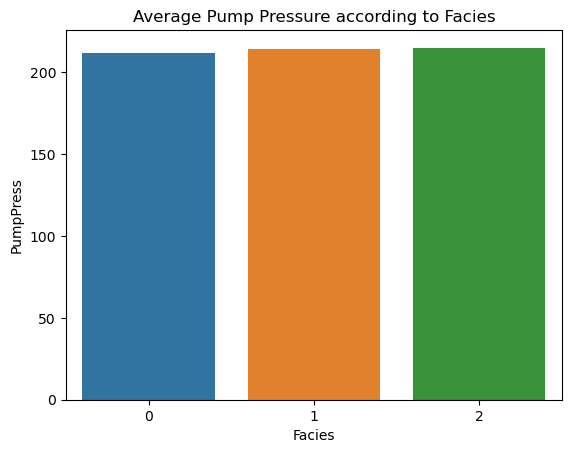

In [37]:
# Plot of the Average Pump Pressure according to Facies
sns.barplot(x=df_p["Facies"], y=df_p["PumpPress"])
plt.title('Average Pump Pressure according to Facies')

Text(0.5, 1.0, 'Average MSE according to Facies')

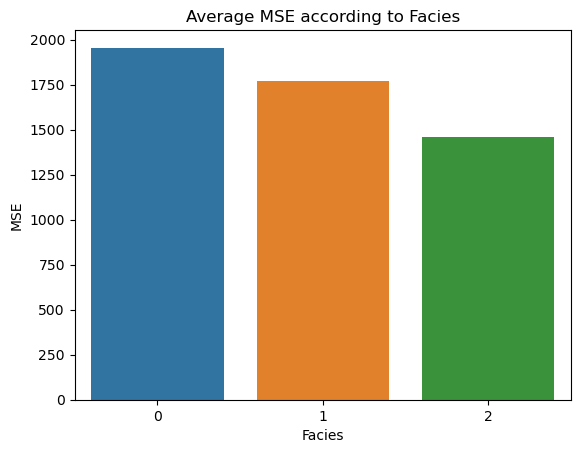

In [38]:
# Plot of the Average MSE according to Facies
sns.barplot(x=df_p["Facies"], y=df_p["MSE"])
plt.title('Average MSE according to Facies')

### 3.3: Correlation plot (Heatmap) of numerical features

Text(0.5, 1.0, 'Correlation map of Numerical Variables')

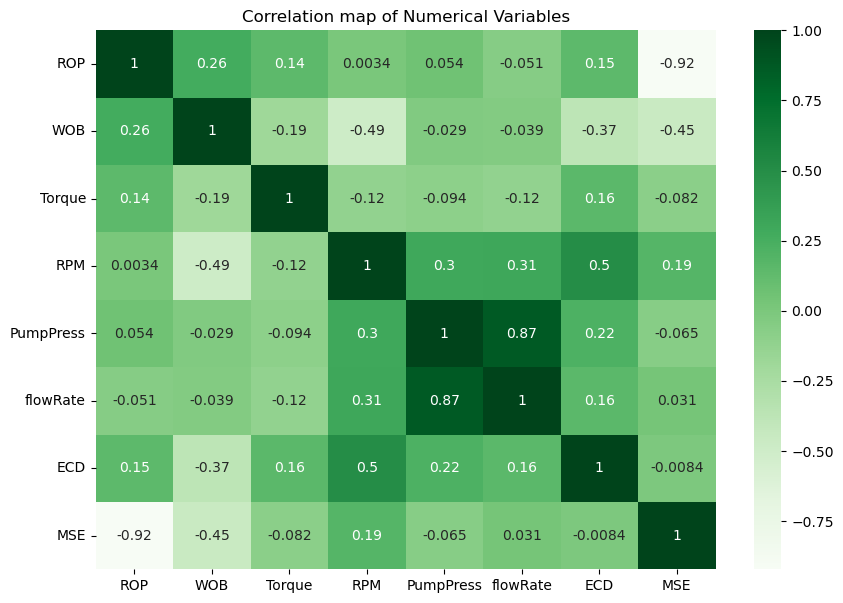

In [39]:
df_feature_num = df_clean[['ROP','WOB','Torque','RPM','PumpPress','flowRate', 'ECD', 'MSE']]
# make a correlation plot (heatmap) to visualize the numerical variables
corr_mx = df_feature_num.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10}, cmap='Greens')
plt.title('Correlation map of Numerical Variables')

Text(0.5, 1.0, 'Proportion of Facies')

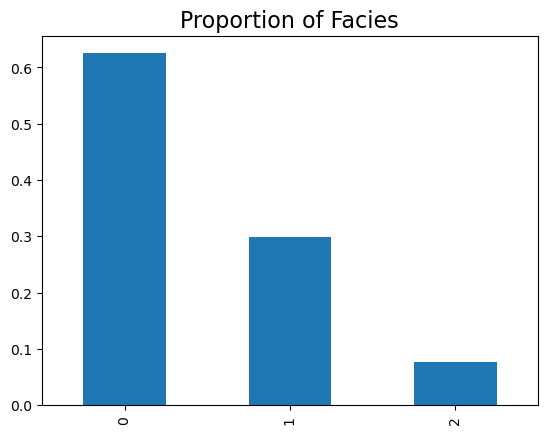

In [40]:
# Check for the proportion of Facies
proportion = df_clean['Facies'].value_counts() / df_clean['Facies'].size
proportion.plot(kind = 'bar')
plt.title('Proportion of Facies', fontsize = 16)

**Comment**

Multicollinearity was observed between ROP and MSE as well as between flow rate and pump pressure. Hence Principal Component Analysis will be used to transform the features to non-correlated principal components

# Feature Engineering

In [41]:
# create list of column names to use later
col_names = list(df_feature_num)
print(col_names)

['ROP', 'WOB', 'Torque', 'RPM', 'PumpPress', 'flowRate', 'ECD', 'MSE']


### Standardization (Standard Scalar)

In [42]:
# Implement standard scalar on drilling data prior to PCA analysis
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df_feature_num)

df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

ROP       WOB    Torque       RPM  PumpPress  flowRate       ECD  \
0 -1.317630  0.824353  0.858302 -1.988480  -2.485417 -2.351382 -2.183713   
1 -1.034154  0.793267  1.156285 -1.838021  -2.469193 -2.351382 -2.992226   
2 -0.799072  1.093484  1.354941 -1.689916  -2.416979 -2.351382 -2.328521   
3 -0.340964  0.992254  1.307163 -1.728296  -2.488844 -2.351382 -2.026837   
4  0.096429  1.280515  1.373800 -1.728296  -2.442457 -2.351382 -2.014770   

        MSE  
0  0.872120  
1  0.557781  
2  0.340899  
3 -0.103444  
4 -0.412683

Text(0.5, 1.0, "Variance Explained by PCA's")

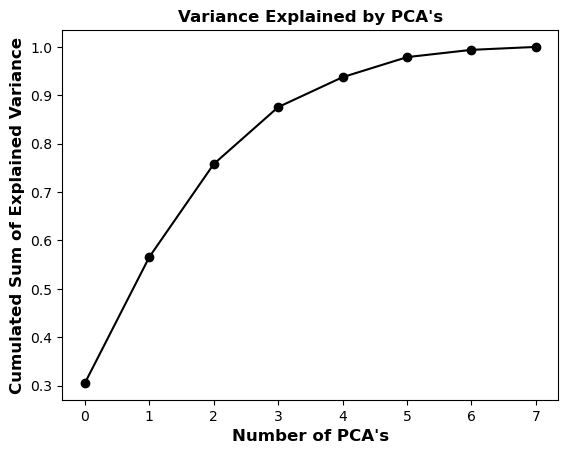

In [43]:
# Find the optimal number of PCA 
df_PCA = df_s[['ROP', 'WOB', 'Torque', 'RPM', 'PumpPress', 'flowRate', 'ECD', 'MSE']]# Define the required data for this analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=df_PCA.shape[1])
pca.fit(df_PCA)
ratios = pca.explained_variance_ratio_

# Plot the explained variance ratios
x = np.arange(df_PCA.shape[1])
plt.plot(x, np.cumsum(ratios), '-o', color = 'black')
plt.xlabel("Number of PCA's", fontsize=12, weight = 'bold')
plt.ylabel("Cumulated Sum of Explained Variance",fontsize=12, weight = 'bold', color = 'black')
plt.title("Variance Explained by PCA's", fontsize=12, weight = 'bold')

In [44]:
# extract the explained variance ratio for individual components.
pca.explained_variance_ratio_

array([0.30570231, 0.26032046, 0.19203692, 0.11760449, 0.06182868,
       0.04140501, 0.01506406, 0.00603807])

In [45]:
# Importing PCA from Sklearn
from sklearn.decomposition import PCA

# Creating PCA object
pca7 = PCA(n_components=7)               
principalComponents = pca7.fit_transform(df_PCA)

#Creating the dataframe
x_PCA = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
x_PCA.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  3.194963  3.642219 -0.105968 -0.797637  0.142730  0.431073 -0.066334
1  3.583141  3.464910 -0.170022 -1.017815  0.943974  0.682197 -0.117846
2  3.552932  2.972814  0.215709 -0.982432  0.423508  0.863910 -0.111372
3  3.738659  2.474556  0.573080 -0.802137  0.394340  0.617789  0.002180
4  4.074473  1.988972  0.643361 -0.767653  0.389039  0.728357 -0.011225

## Clustering Analysis

In [46]:
x_PCA.describe()

PC1           PC2           PC3           PC4           PC5  \
count  3.520000e+02  3.520000e+02  3.520000e+02  3.520000e+02  3.520000e+02   
mean  -9.525209e-17  4.147566e-17  3.658690e-17  1.245453e-16 -1.577021e-18   
std    1.566073e+00  1.445163e+00  1.241238e+00  9.713477e-01  7.043001e-01   
min   -3.676826e+00 -2.984535e+00 -2.412731e+00 -2.485871e+00 -2.160568e+00   
25%   -9.746727e-01 -1.000456e+00 -1.022406e+00 -7.295726e-01 -4.208778e-01   
50%   -2.379918e-01 -3.722358e-01 -4.541887e-02 -1.088421e-01  3.588374e-02   
75%    8.565997e-01  7.937526e-01  7.130227e-01  7.496426e-01  4.246400e-01   
max    4.315807e+00  5.525805e+00  5.307126e+00  3.231520e+00  2.240292e+00   

                PC6           PC7  
count  3.520000e+02  3.520000e+02  
mean   2.239370e-17  6.340735e-17  
std    5.763538e-01  3.476433e-01  
min   -1.897975e+00 -1.742248e+00  
25%   -3.865601e-01 -9.748199e-02  
50%   -1.315172e-02 -2.553620e-02  
75%    3.870716e-01  5.666067e-02  
max    2.309552e+00  2.237277e+00

### Kmeans Clustering

For n_clusters = 2 The average silhouette_score is : 0.4038471204504773
For n_clusters = 3 The average silhouette_score is : 0.3102317590792678
For n_clusters = 4 The average silhouette_score is : 0.3220508581364
For n_clusters = 5 The average silhouette_score is : 0.3156018433156952
For n_clusters = 6 The average silhouette_score is : 0.32326761693714073


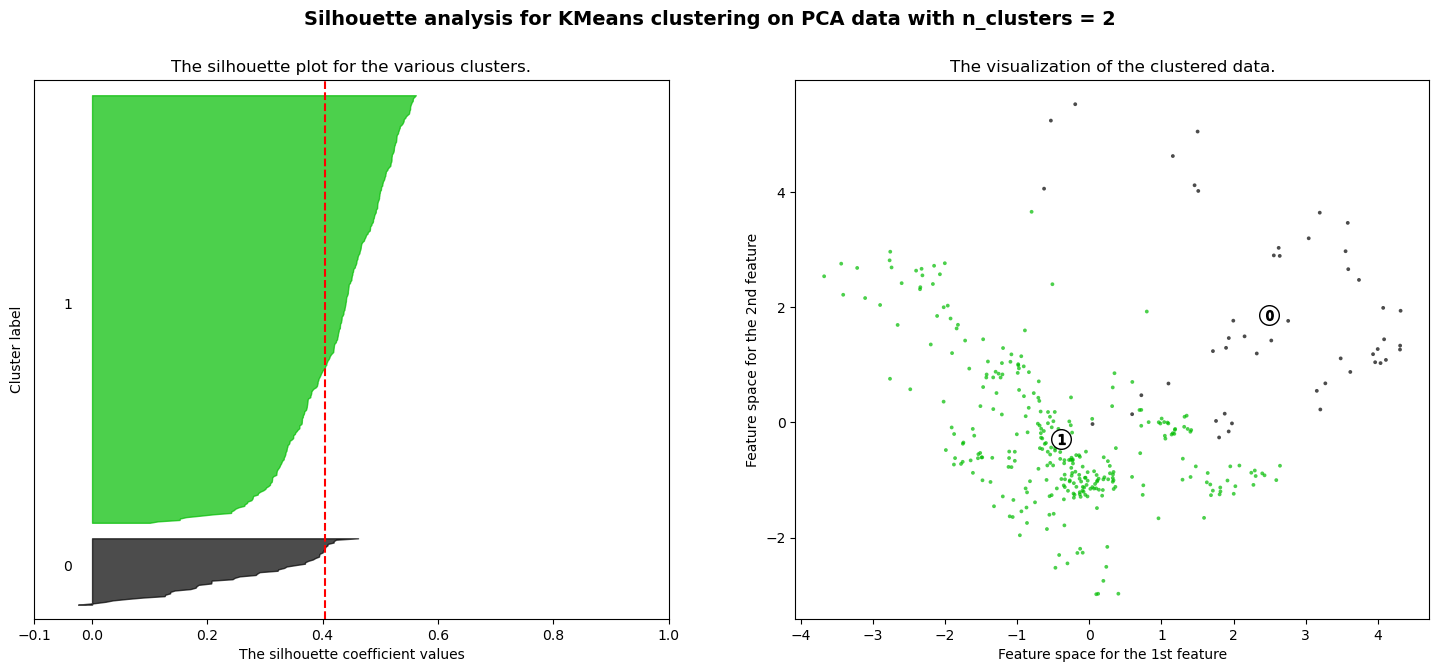

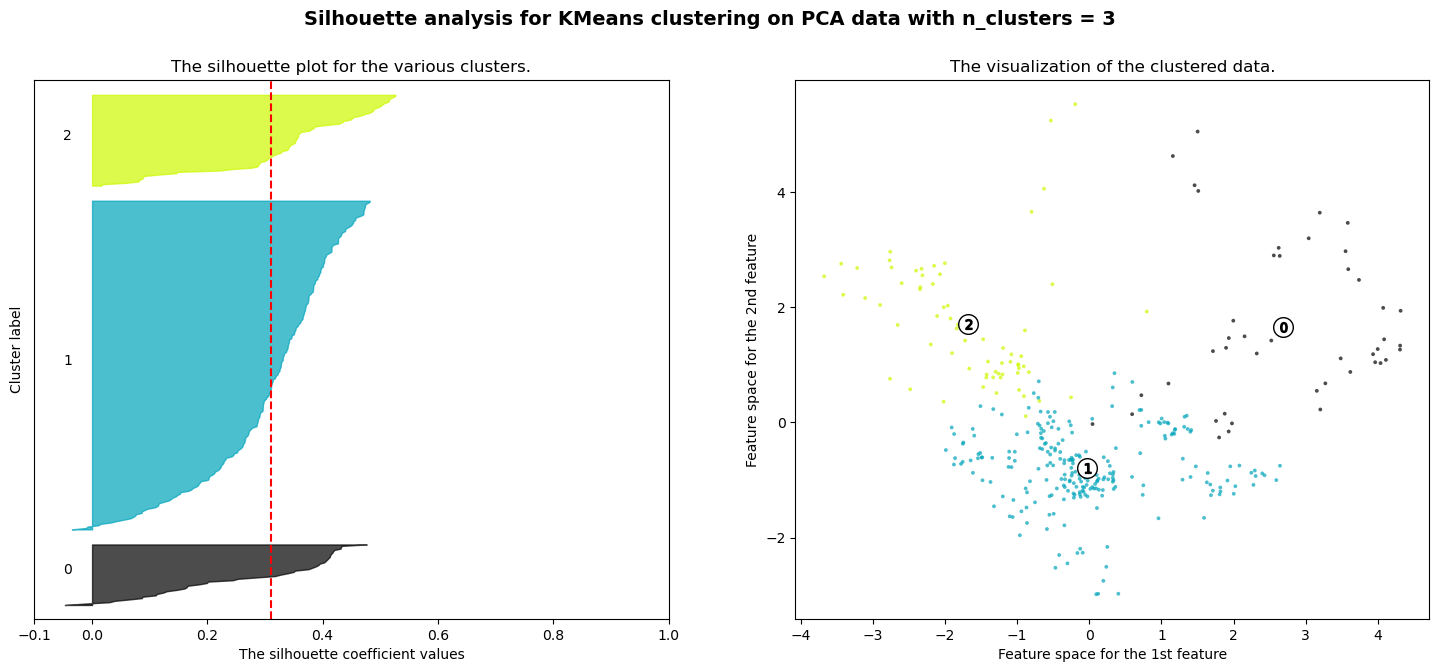

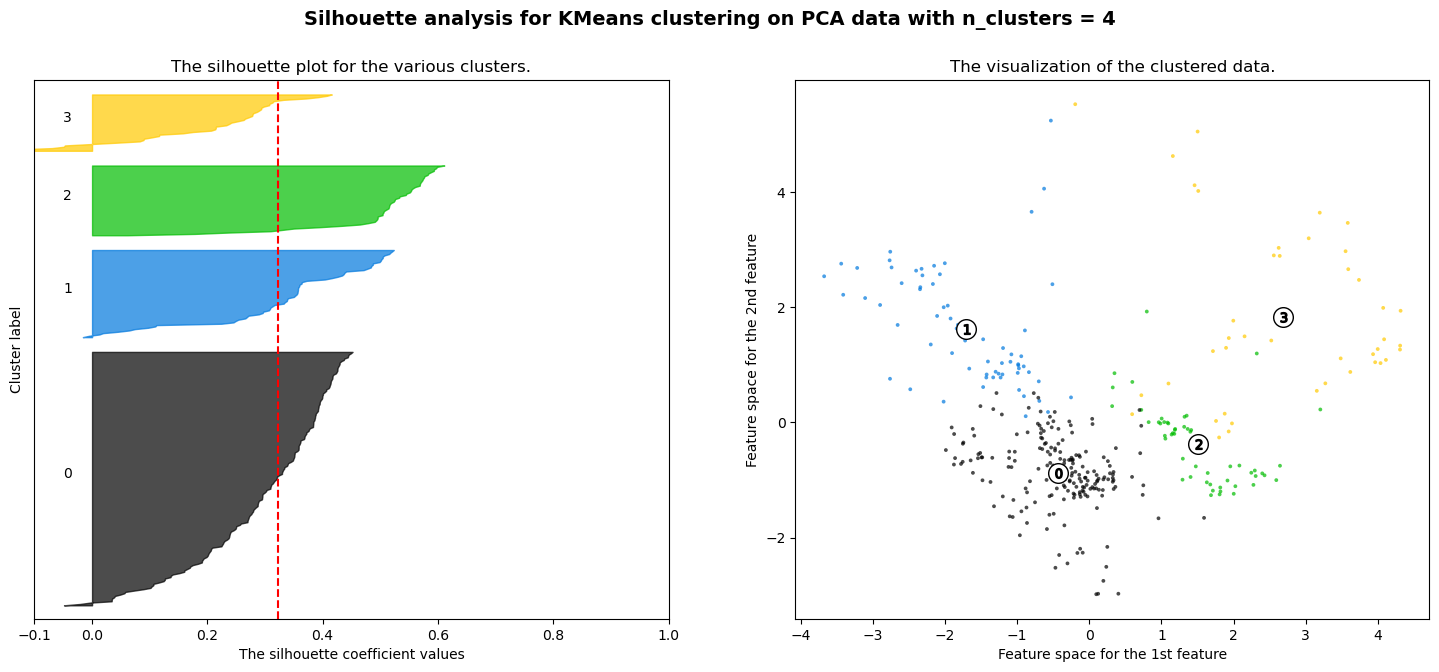

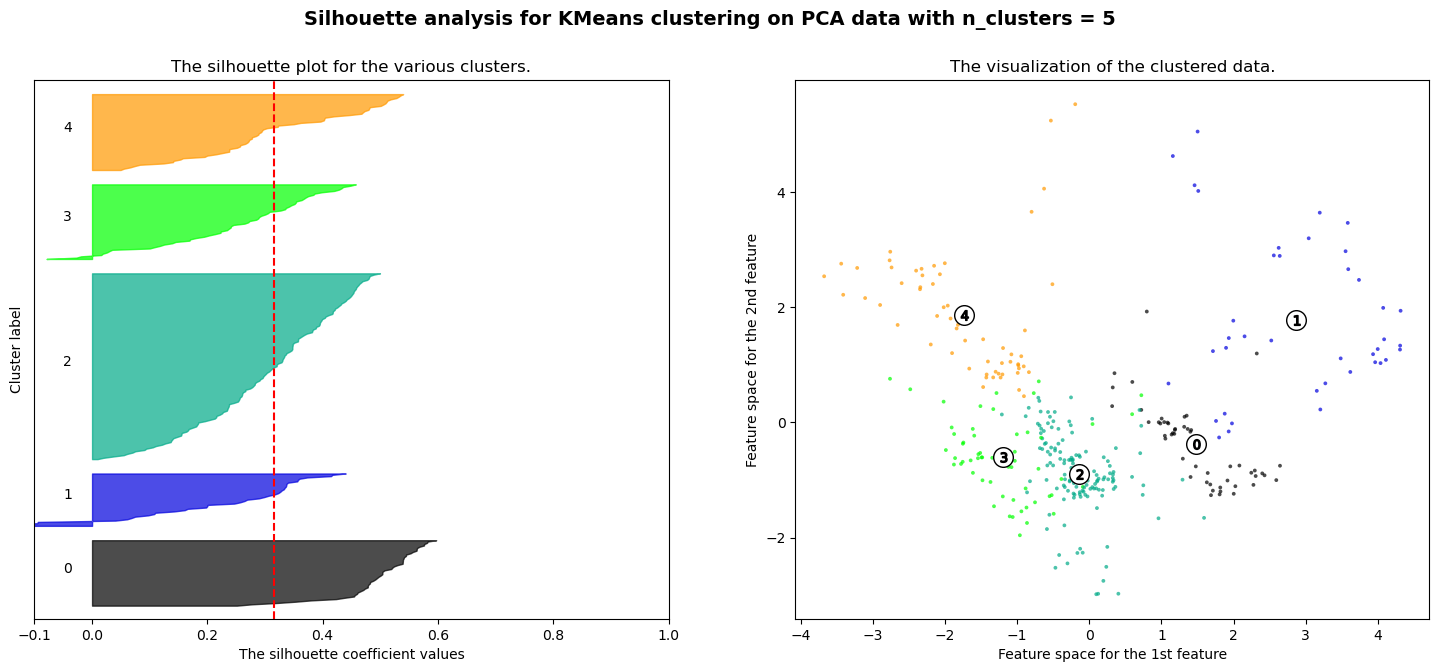

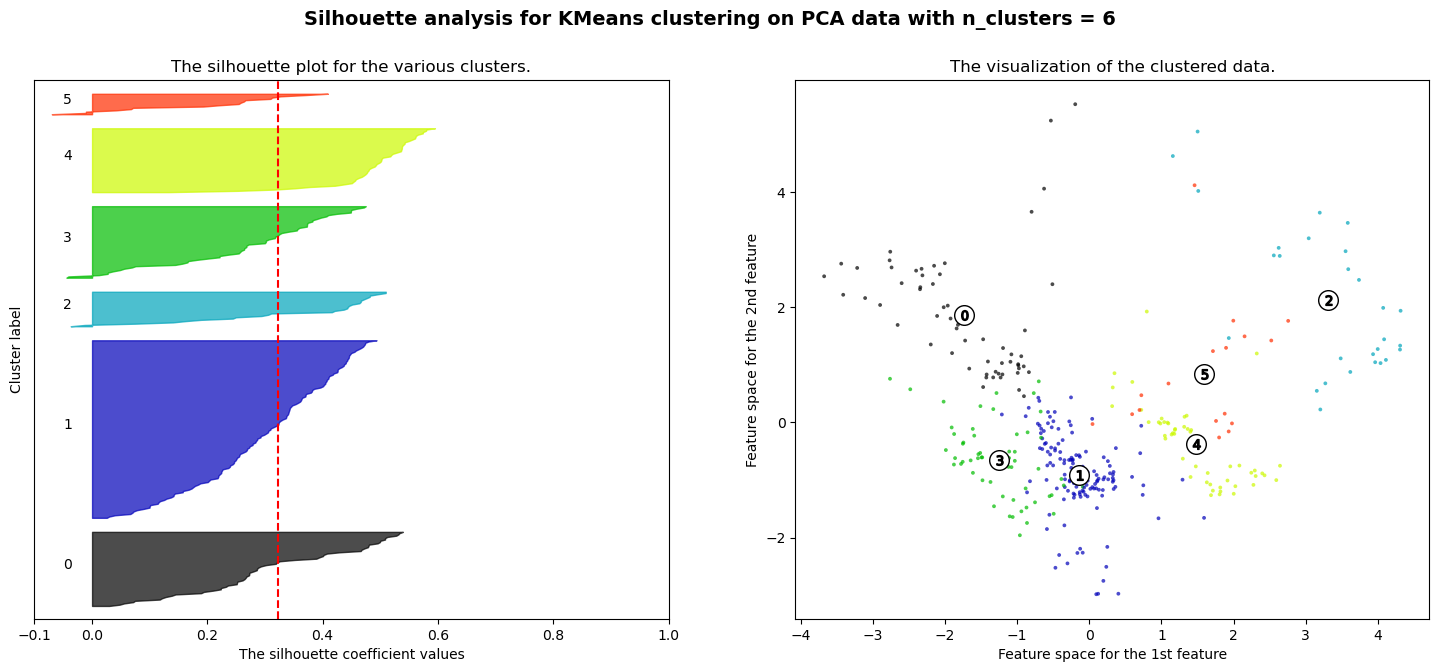

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = x_PCA.iloc[:,:].values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on PCA data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Comments**

Despite the fact, the silhoutte score yielded 2 as the best number of clusters for KMeans, 3 clusters will be utilized for comparison sake since the known facies are available.

In [48]:
from sklearn.cluster import KMeans

Core_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
cluster_labels = Core_kmeans.fit_predict(x_PCA)

In [49]:
# Concatenate Facies_Kmeans into df_analyze
df_analyze = df_clean.copy()
df_analyze = df_analyze.reset_index(drop=True)
df_analyze['Facies_Kmeans'] = cluster_labels
df_analyze.head()

Depth      ROP     WOB  Torque      RPM  PumpPress   flowRate     ECD  \
0  2968.0  14.1333  7.9843  37.363  137.790    191.249  2215.4763  1.4242   
1  2968.5  15.7535  7.9297  37.837  139.068    191.391  2215.4763  1.4175   
2  2969.0  17.0971  8.4570  38.153  140.326    191.848  2215.4763  1.4230   
3  2969.5  19.7154  8.2792  38.077  140.000    191.219  2215.4763  1.4255   
4  2970.0  22.2153  8.7855  38.183  140.000    191.625  2215.4763  1.4256   

   Facies          MSE  Facies_Kmeans  
0       0  2420.162339              1  
1       0  2219.205810              1  
2       0  2080.553477              1  
3       0  1796.485952              1  
4       0  1598.789712              1

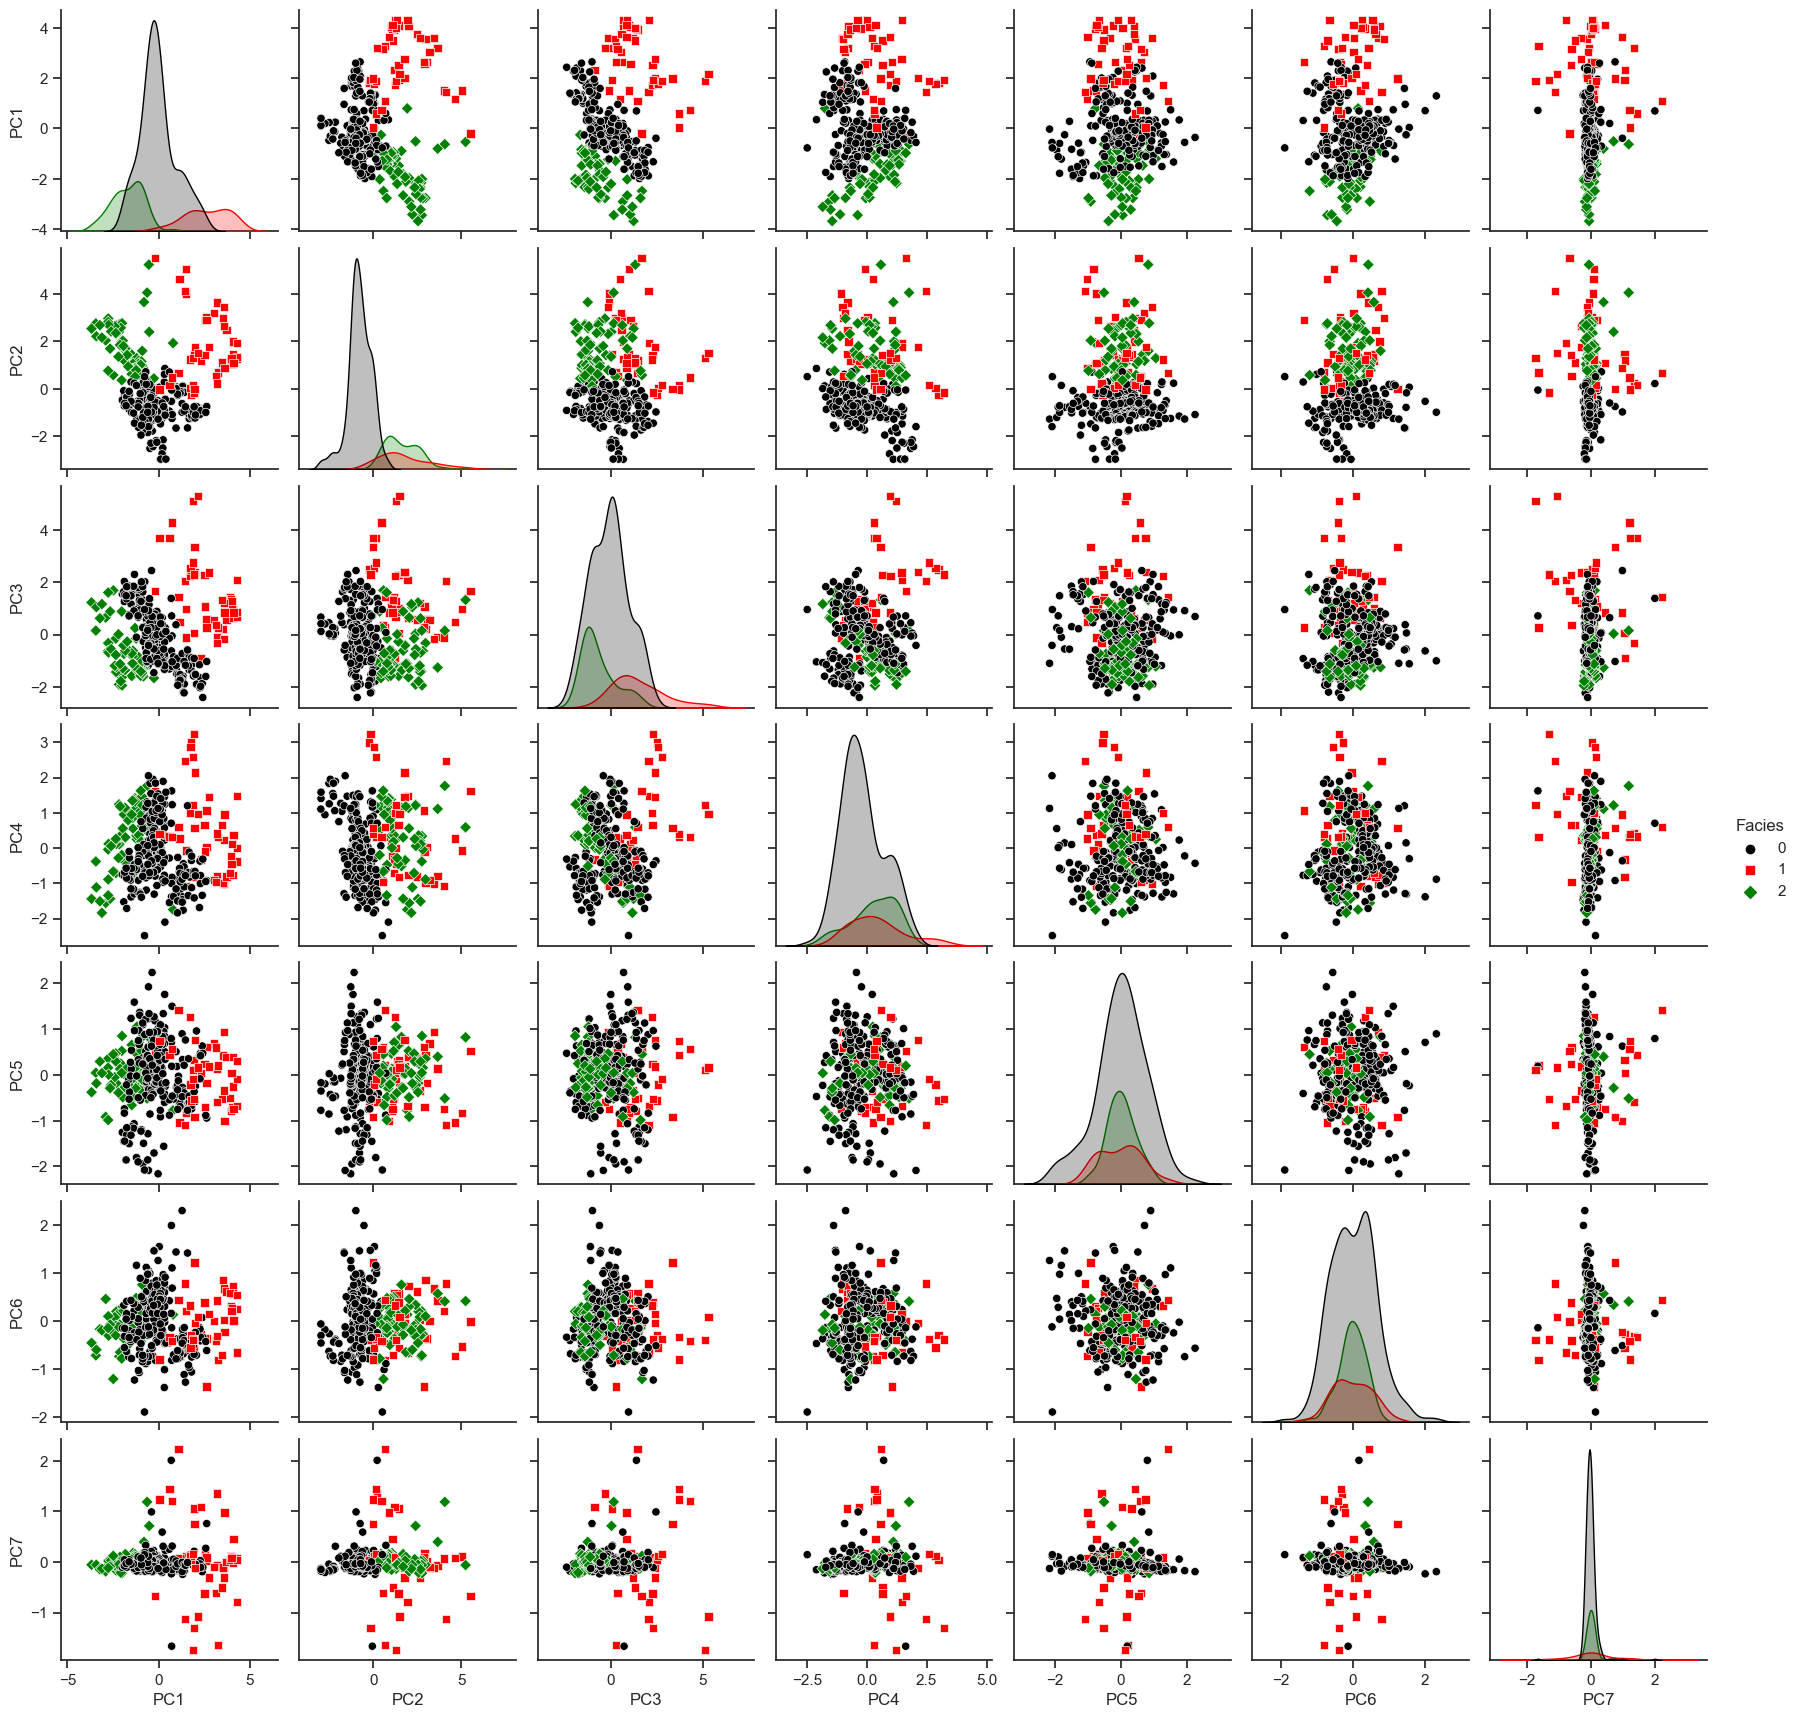

In [50]:
# Create a matrix scatterplot according to Kmeans clustering
sns.set_theme(style="ticks")
x_PCA['Facies'] = cluster_labels
sns.pairplot(x_PCA, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], hue = 'Facies', markers=["o", "s", "D"] , palette = ['black', 'red', 'green']) # Create a matrix scatterplot

### Hidden Markov Model with Gaussian emissions (HMM.GAUSSIAN)

In [51]:
X= x_PCA.copy()
y= df_analyze[['Facies']]

State sequence:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 2
 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2]

Transition matrix:
[[0.87955971 0.07491486 0.04552544]
 [0.14784382 0.69030055 0.16185564]
 [0.02198249 0.05579281 0.9222247 ]]


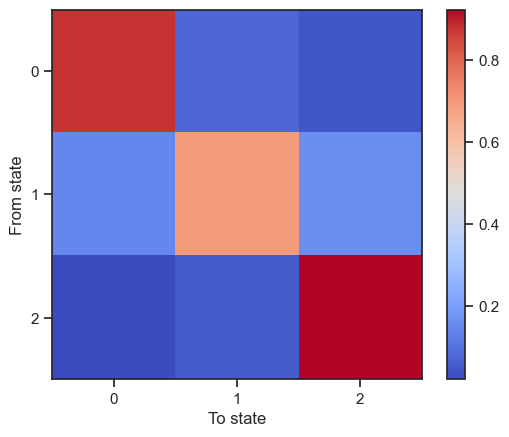

In [52]:
# Create an HMMGaussian model with 3 hidden states
model = hmm.GaussianHMM(n_components=3, covariance_type='full', n_iter=1000, random_state=42)

# Fit the model to the training data
model.fit(X)

# Get the hidden state sequence 
state_sequence = model.predict(X)

# Get the transition matrix of the model
transition_matrix = model.transmat_

# Print the state sequence and transition matrix
print("State sequence:")
print(state_sequence)
print("\nTransition matrix:")
print(transition_matrix)

# Create a heatmap of the transition matrix
plt.imshow(transition_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel('To state')
plt.ylabel('From state')
plt.show()

In [53]:
# Concatenate Facies_HMMG into df_analyze
df_analyze['Facies_HMMG'] = state_sequence
df_analyze.head()

Depth      ROP     WOB  Torque      RPM  PumpPress   flowRate     ECD  \
0  2968.0  14.1333  7.9843  37.363  137.790    191.249  2215.4763  1.4242   
1  2968.5  15.7535  7.9297  37.837  139.068    191.391  2215.4763  1.4175   
2  2969.0  17.0971  8.4570  38.153  140.326    191.848  2215.4763  1.4230   
3  2969.5  19.7154  8.2792  38.077  140.000    191.219  2215.4763  1.4255   
4  2970.0  22.2153  8.7855  38.183  140.000    191.625  2215.4763  1.4256   

   Facies          MSE  Facies_Kmeans  Facies_HMMG  
0       0  2420.162339              1            1  
1       0  2219.205810              1            0  
2       0  2080.553477              1            0  
3       0  1796.485952              1            0  
4       0  1598.789712              1            0

In [54]:
df_analyze['Facies'].value_counts()

0    220
1    105
2     27
Name: Facies, dtype: int64

In [55]:
df_analyze['Facies_Kmeans'].value_counts()

0    240
2     66
1     46
Name: Facies_Kmeans, dtype: int64

In [56]:
# Appropriate assignation of Facies 
df_analyze['Facies_Kmeans'] = df_analyze['Facies_Kmeans'].replace(2, 'Two')
df_analyze['Facies_Kmeans'] = df_analyze['Facies_Kmeans'].replace(1, 2)
df_analyze['Facies_Kmeans'] = df_analyze['Facies_Kmeans'].replace('Two', 1)
df_analyze['Facies_Kmeans'].value_counts()

0    240
1     66
2     46
Name: Facies_Kmeans, dtype: int64

In [57]:
df_analyze['Facies_HMMG'].value_counts()

2    181
0    109
1     62
Name: Facies_HMMG, dtype: int64

In [58]:
# Appropriate assignation of Facies
df_analyze['Facies_HMMG'] = df_analyze['Facies_HMMG'].replace(2, 'Zero')
df_analyze['Facies_HMMG'] = df_analyze['Facies_HMMG'].replace(0, 'One')
df_analyze['Facies_HMMG'] = df_analyze['Facies_HMMG'].replace(1, 2)
df_analyze['Facies_HMMG'] = df_analyze['Facies_HMMG'].replace('One', 1)
df_analyze['Facies_HMMG'] = df_analyze['Facies_HMMG'].replace('Zero', 0)
df_analyze['Facies_HMMG'].value_counts()

0    181
1    109
2     62
Name: Facies_HMMG, dtype: int64

In [59]:
df_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Depth          352 non-null    float64
 1   ROP            352 non-null    float64
 2   WOB            352 non-null    float64
 3   Torque         352 non-null    float64
 4   RPM            352 non-null    float64
 5   PumpPress      352 non-null    float64
 6   flowRate       352 non-null    float64
 7   ECD            352 non-null    float64
 8   Facies         352 non-null    int64  
 9   MSE            352 non-null    float64
 10  Facies_Kmeans  352 non-null    int64  
 11  Facies_HMMG    352 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 33.1 KB


In [60]:
def resultplot(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
    ax[0].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies == 0, color = 'red')
    ax[0].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies == 1, color = 'black')
    ax[0].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies == 2, color = 'grey')
    
    ax[1].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies_Kmeans == 0, color = 'red')
    ax[1].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies_Kmeans == 1, color = 'black')
    ax[1].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies_Kmeans == 2, color = 'grey')
    
    ax[2].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies_HMMG == 0, color = 'red')
    ax[2].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies_HMMG == 1, color = 'black')
    ax[2].fill_betweenx(logs.Depth, x1 = 0, x2=12, where= logs.Facies_HMMG == 2, color = 'grey')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
   
    ax[0].set_ylabel("Depth",fontsize = 16)
    ax[0].set_xlabel("Actual_Facies", fontsize = 10)
    ax[1].set_xlabel("KMeans_Facies", fontsize = 10)
    ax[2].set_xlabel("HMMGaussian_Facies", fontsize = 10)
   
    
    ax[1].set_yticklabels([])
    legend_elements = [Patch(facecolor='red', edgecolor='black', label= 'Facies 0'),
                       Patch(facecolor='black', edgecolor='black',   label= 'Facies 1'),
                       Patch(facecolor='grey', edgecolor='black', label= 'Facies 2')]
    ax[0].legend(handles=legend_elements, loc='upper left')
    
    f.suptitle('Comparative Analysis of Facies Predictions', fontsize=20,y=0.94)

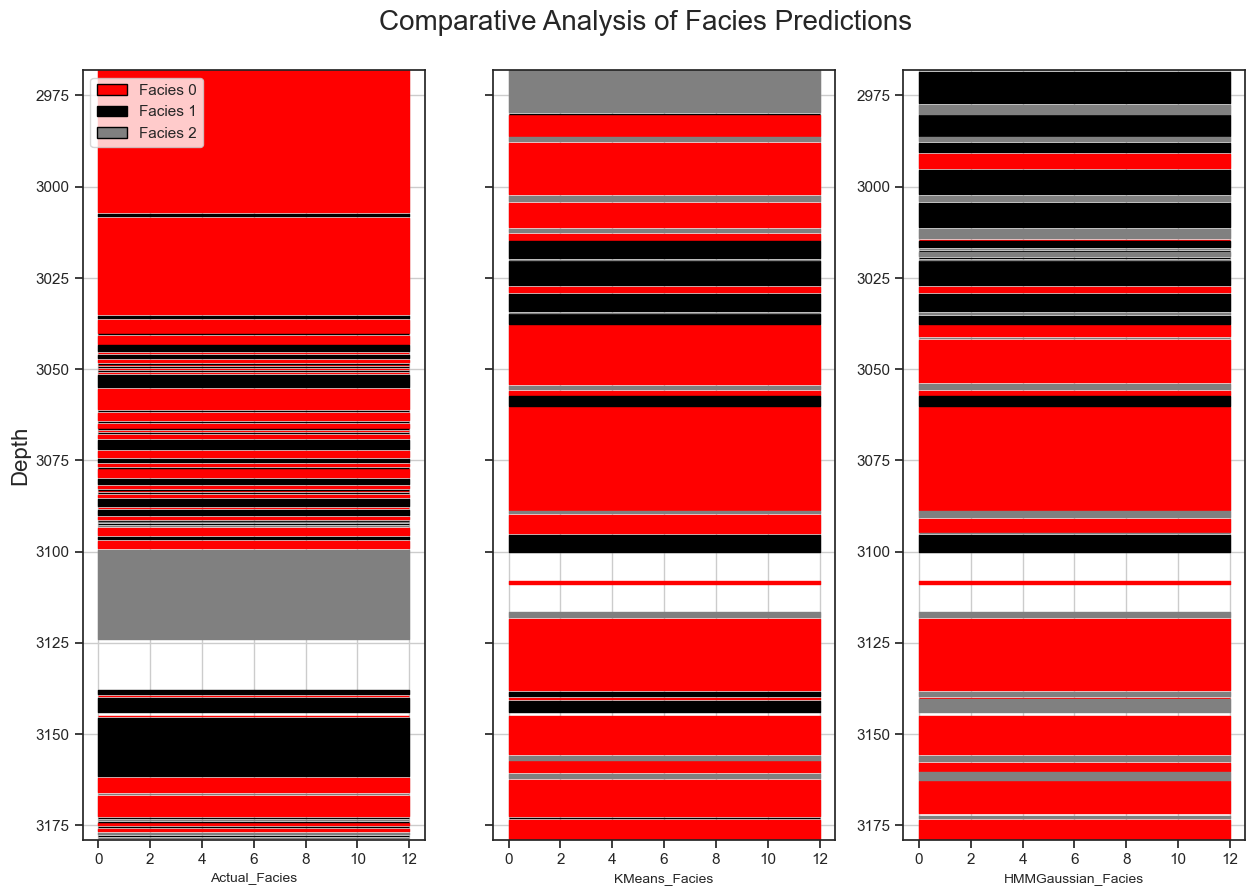

In [61]:
resultplot(df_analyze)

In [62]:
from sklearn.metrics import confusion_matrix

Actual = df_analyze[['Facies']]
KMeans_Facies = df_analyze[['Facies_Kmeans']]
HMMGaussian_Facies = df_analyze[['Facies_HMMG']]

In [63]:
# Confusion Matrix
cf_matrix_km = confusion_matrix(Actual,KMeans_Facies)
cf_matrix_HM = confusion_matrix(Actual,HMMGaussian_Facies)

<AxesSubplot:title={'center':'HMMGaussian'}>

<Figure size 640x480 with 0 Axes>

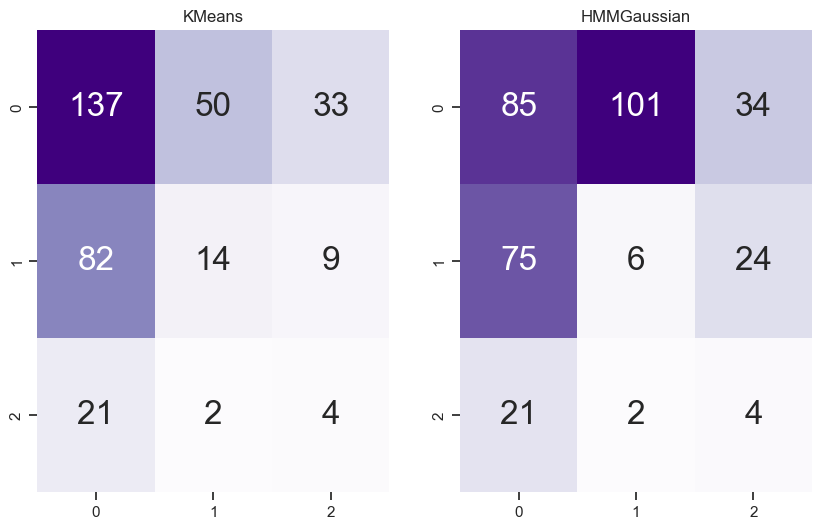

In [64]:
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(cf_matrix_km, annot=True, cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,2,2)
plt.title("HMMGaussian")
sns.heatmap(cf_matrix_HM, annot=True, cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})

**Comments**

* The objective of this study was to determine the hidden states (Facies/Rocktypes) based on the observations (Drilling data: WOB, RPM, ROP, Torque, etc.)
* Using the Confusion matrix to evaluate the Kmeans clustering and the HMMGaussian performance, it can be observed that the Kmeans did better in the prediction of Facies 0 and 1, while they had the same performance for Facies 2.
* HMMGaussian failure can be attributed to its inadequacy in predicting multilayers of emissions. 

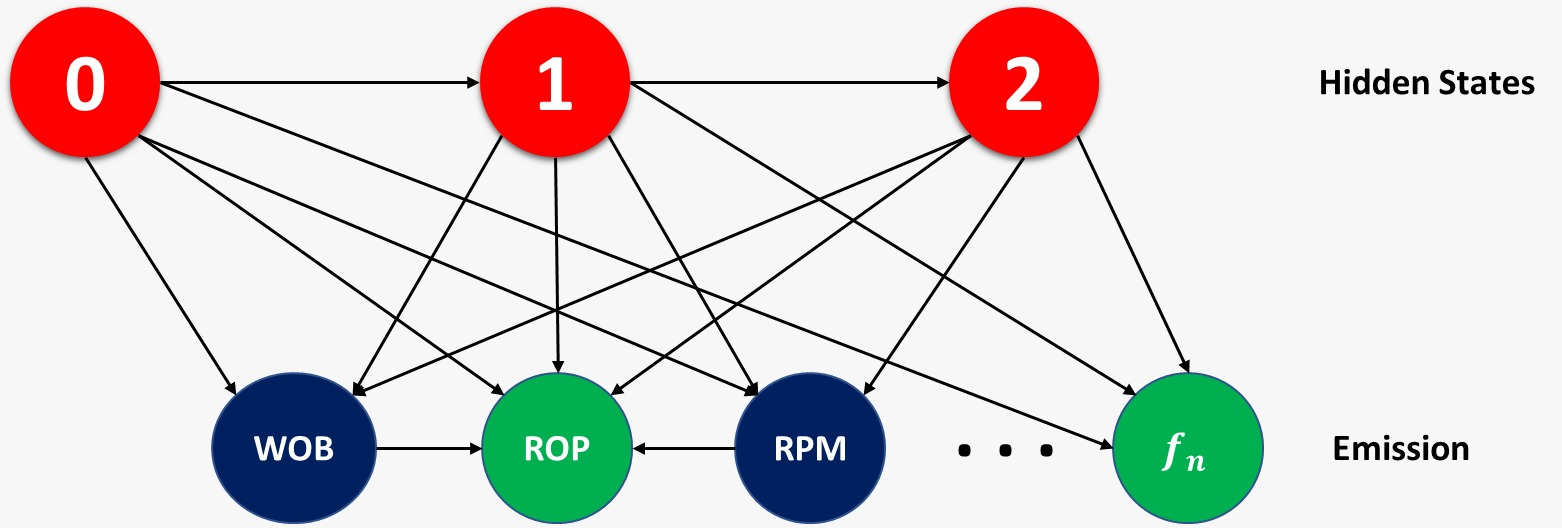

The above picture represent the base assumption of the Hidden Markov Model while the picture below represent the model's limitation considering multivariate dataset that has multiple layers of emissions.

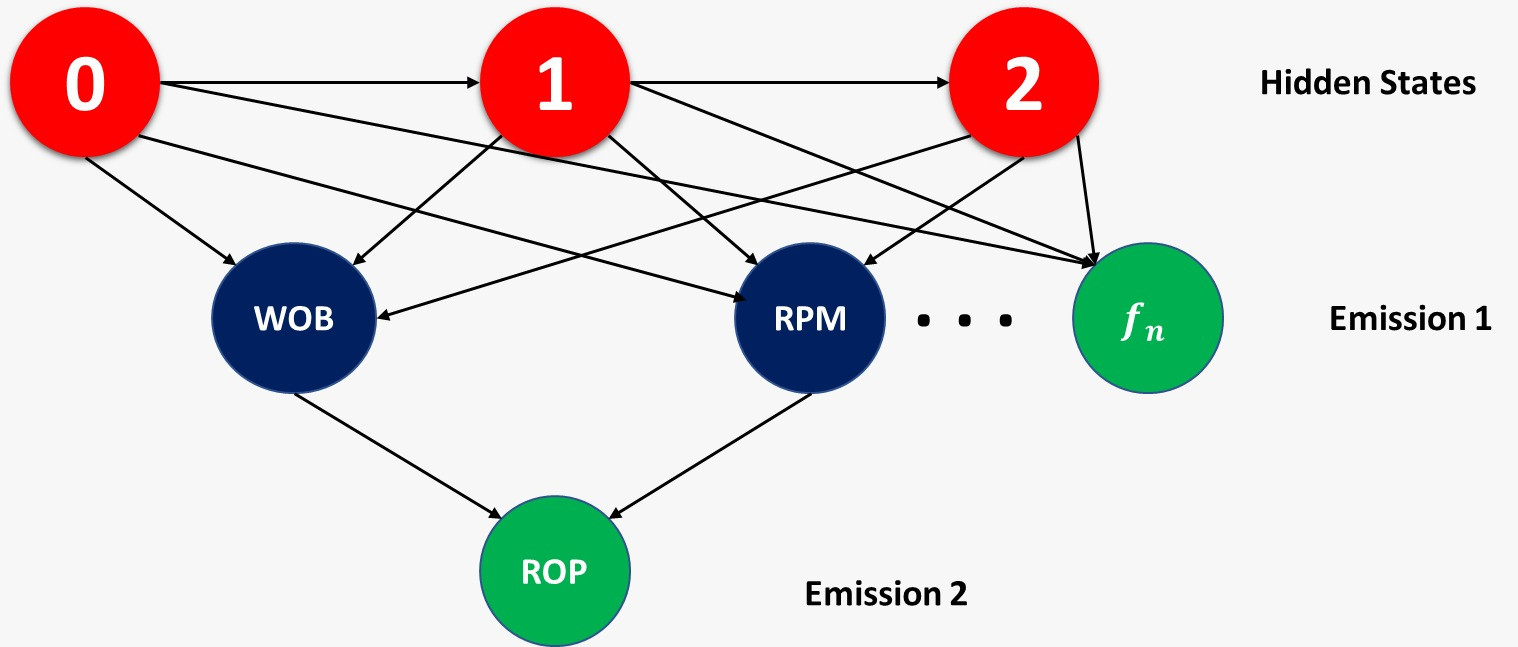

* As a Subject Matter Expert (SME), ROP is an observable property of RPM, WOB, Torque and other drilling parameters as well as the formation lithology (facies) which in this study is described as the hidden state. ROP is a sub emission to the observations (RPM, WOB, Torque, etc.). This potentially affected the model's ability to rightfully predict the hidden states appropriately (Facies misclassification). 
* ALthough Kmeans clustering performed well in Facies 0 compared to Facies 1 and 2 the misclassification in the last two facies could be as a result of few observations available for learning. Hence, more data (balanced) will be needed for proper classification.